### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from numpy import mean, std
from scipy import stats
import shap
from scipy.stats import yeojohnson
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    StandardScaler,
)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

# Set float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

c:\Users\G531\anaconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\G531\anaconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, 

### Read Data

In [2]:
file_path = "C:/Users/G531/OneDrive/Desktop/Rakamin/VIX/idx partners/loan_data_2007_2014.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-99,5.000,NaN,NaN,3.000,0.000,1687,9.400,4.000,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-01,2.000,NaN,NaN,2.000,0.000,2956,98.500,10.000,f,0.000,0.000,3003.654,3003.650,2400.000,603.650,0.000,0.000,0.000,Jun-14,649.910,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0.000,Feb-96,1.000,35.000,NaN,10.000,0.000,5598,21.000,37.000,f,0.000,0.000,12226.302,12226.300,10000.000,2209.330,16.970,0.000,0.000,Jan-15,357.480,NaN,Jan-15,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0.000,Jan-96,0.000,38.000,NaN,15.000,0.000,27783,53.900,38.000,f,766.900,766.900,3242.170,3242.170,2233.100,1009.070,0.000,0.000,0.000,Jan-16,67.790,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Key Takeaway

- The first column (Unnamed: 0) is just an index, we will drop it.

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-99,5.000,NaN,NaN,3.000,0.000,1687,9.400,4.000,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-01,2.000,NaN,NaN,2.000,0.000,2956,98.500,10.000,f,0.000,0.000,3003.654,3003.650,2400.000,603.650,0.000,0.000,0.000,Jun-14,649.910,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0.000,Feb-96,1.000,35.000,NaN,10.000,0.000,5598,21.000,37.000,f,0.000,0.000,12226.302,12226.300,10000.000,2209.330,16.970,0.000,0.000,Jan-15,357.480,NaN,Jan-15,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0.000,Jan-96,0.000,38.000,NaN,15.000,0.000,27783,53.900,38.000,f,766.900,766.900,3242.170,3242.170,2233.100,1009.070,0.000,0.000,0.000,Jan-16,67.790,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.000,13079729.906,10893711.625,54734.000,3639987.000,10107897.000,20731209.000,38098114.000
member_id,466285.000,14597660.623,11682367.441,70473.000,4379705.000,11941075.000,23001541.000,40860827.000
loan_amnt,466285.000,14317.278,8286.509,500.000,8000.000,12000.000,20000.000,35000.000
funded_amnt,466285.000,14291.801,8274.371,500.000,8000.000,12000.000,20000.000,35000.000
funded_amnt_inv,466285.000,14222.330,8297.638,0.000,8000.000,12000.000,19950.000,35000.000
int_rate,466285.000,13.829,4.358,5.420,10.990,13.660,16.490,26.060
installment,466285.000,432.061,243.486,15.670,256.690,379.890,566.580,1409.990
annual_inc,466281.000,73277.381,54963.569,1896.000,45000.000,63000.000,88960.000,7500000.000
dti,466285.000,17.219,7.851,0.000,11.360,16.870,22.780,39.990
delinq_2yrs,466256.000,0.285,0.797,0.000,0.000,0.000,0.000,29.000


In [7]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [8]:
# Check Number of Rows & Features

print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 466285
Total Features : 74


In [9]:
# Grouping Features Based on Their Data Type

num = df.select_dtypes(include=[np.number]).columns
cat = df.select_dtypes(exclude=[np.number]).columns


In [10]:
def get_data_info(df):
    """
    Get data info for each column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to get data info for.

    Returns:
        pd.DataFrame: A DataFrame with the following columns:
            * Feature: The name of the column.
            * Data Type: The data type of the column.
            * Null Num: The number of null values in the column.
            * Null %: The percentage of null values in the column.
            * Unique Num: The number of unique values in the column.
            * Unique Sample: The first four unique values in the column.
    """
    list_item = []
    for col in df.columns:
        list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
    desc_df = pd.DataFrame(data=list_item, columns=['Feature', 'Data Type', 'Null Num', 'Null %', 'Unique Num', 'Unique Sample'])
    return desc_df

desc_df = get_data_info(df)
desc_df

,Feature,Data Type,Null Num,Null %,Unique Num,Unique Sample
0,id,int64,0,0.000,466285,"[1077501, 1077430, 1077175, 1076863]"
1,member_id,int64,0,0.000,466285,"[1296599, 1314167, 1313524, 1277178]"
2,loan_amnt,int64,0,0.000,1352,"[5000, 2500, 2400, 10000]"
3,funded_amnt,int64,0,0.000,1354,"[5000, 2500, 2400, 10000]"
4,funded_amnt_inv,float64,0,0.000,9854,"[4975.0, 2500.0, 2400.0, 10000.0]"
5,term,object,0,0.000,2,"[ 36 months, 60 months]"
6,int_rate,float64,0,0.000,506,"[10.65, 15.27, 15.96, 13.49]"
7,installment,float64,0,0.000,55622,"[162.87, 59.83, 84.33, 339.31]"
8,grade,object,0,0.000,7,"[B, C, A, E]"
9,sub_grade,object,0,0.000,35,"[B2, C4, C5, C1]"


Key Takeaways:

- There are some features which considered to be dropped
    - Unnamed: 0, id, and member_id are representing unique values for each rows.
    - Policy code, and application type have only 1 value.
    - Unnecessary features like title, url, zip_code, addr_state, and desc.
    - Sub_grade seems like a form of expert judgement from grade
    - 100% null values like annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi,total_cu_tl, and inq_last_12m.

- Some features with < 20% of missing values will be maintained for imputation if possible
    - emp_title, emp_length, acc_now_deline

- Some features with > 20% of missing values will have a higher probability of being dropped since performing imputation seems to have a huge impact on originality of the dataset.
    - mths_since_last_deline, mths_since_last_record, next_pymnt_d,mths_since_last_major_derog

- Some features with date-like values will be converted to datetime
    - last_pymnt_d, next_pymnt_d, last_credit_pull_d, earliest_cr_line

- Some feature's datatype will be changed accordingly
    - term to integer
    - annual_inc to integer

- loan_status is the target feature with categorical values, therefore feature engineering will be performed.

## Exploratory Data Analysis

### Univariate Analysis

In [11]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

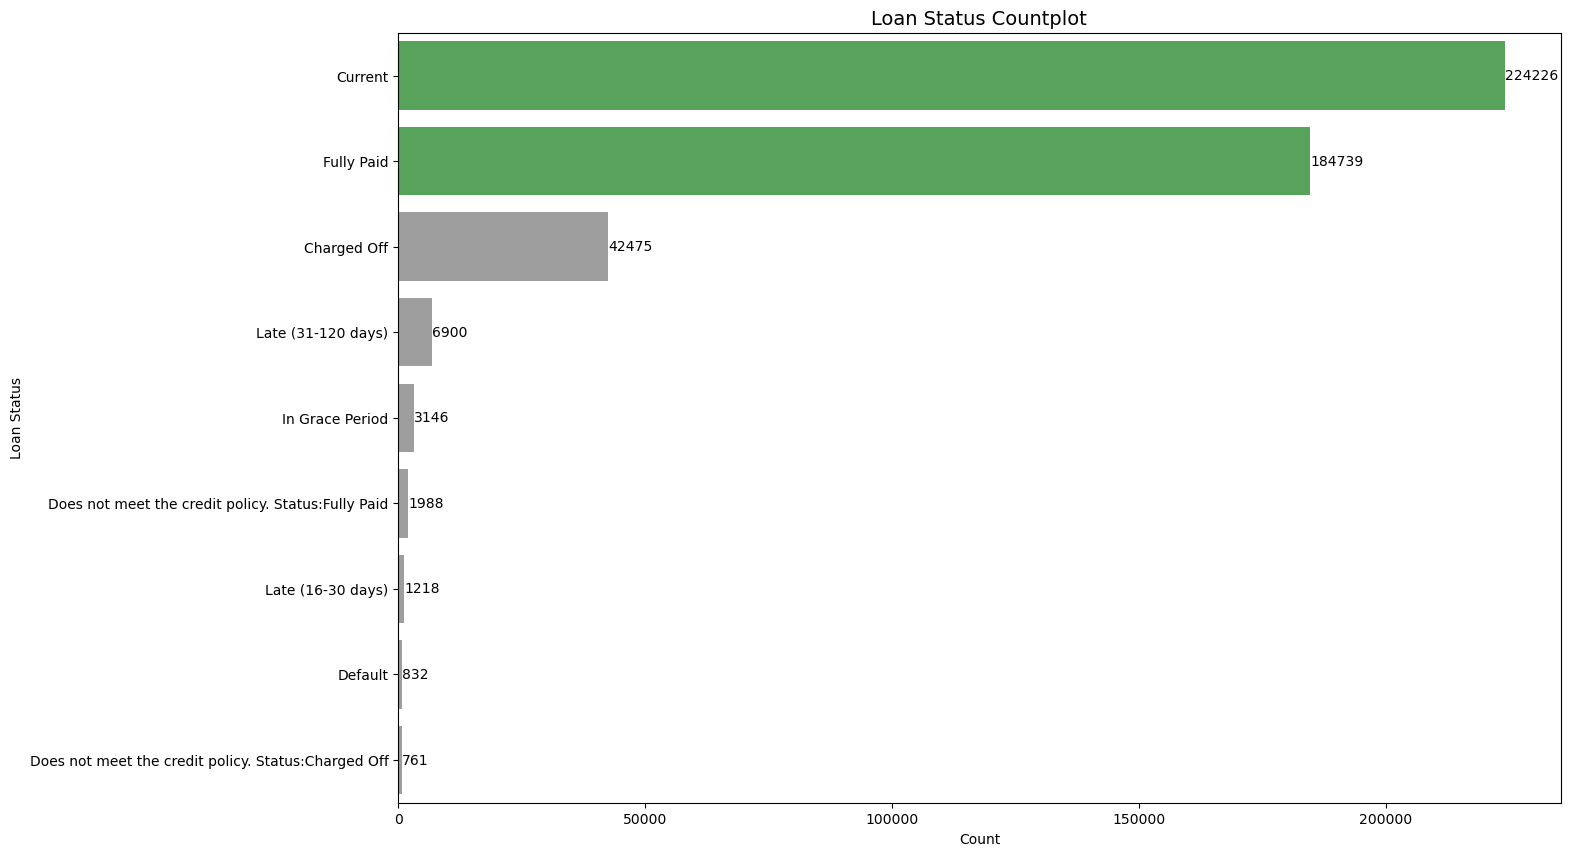

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(y=df['loan_status'], palette=['#4CAF50']*2 + ['#9e9e9e']*7, order=df['loan_status'].value_counts().index)
plt.title('Loan Status Countplot', fontsize=14)

total_count = len(df['loan_status'])
for i, value in enumerate(df['loan_status'].value_counts()):
    count_text = f'{value}'
    plt.text(value, i, count_text, ha='left', va='center', color='black')

plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

Key Takeaways:

- The loan status distribution reveals that the majority of loans are either "Current" or "Fully Paid," indicating that most borrowers are meeting their repayment obligations. However, there is a significant number of loans in the "Charged Off" category, suggesting a higher credit risk and potential financial loss for the lender.

- The presence of loans in the "Late (31-120 days)" category signifies delayed payments and a potential warning sign of financial difficulties for borrowers. Additionally, loans categorized as "Charged Off" represent a relatively small percentage but should not be overlooked due to the associated financial loss for the lender.

- Loans marked as "Does not meet the credit policy" (both "Fully Paid" and "Charged Off") suggest that some borrowers were approved despite not meeting the standard credit criteria. This highlights the importance of evaluating the effectiveness of credit policies and standards to manage and mitigate risk effectively.

- The occurrence of loans in the "In Grace Period" status indicates the need for careful monitoring to ensure timely repayments. While this category is relatively rare, it emphasizes the importance of closely monitoring loan accounts to minimize potential risks.

With this description we can create a new binary feature called loan_status to indicate whether a loan is considered good or bad. A loan is considered good if it is either Current or Fully Paid, and bad loan status includes all loans that are Late (31-120), Default, Charged Off, or Does not meet the credit policy. Status:Fully Paid.


In [13]:
# List of good loan statuses
good_status = ['Fully Paid', 'Current']

# Create a copy of the data
loan_viz = df.copy()

# Create a new column 'target' based on loan status
# If loan status is in good_status, assign 0 to 'target', otherwise assign 1
loan_viz['target'] = loan_viz['loan_status'].apply(lambda x: 0 if x in good_status else 1)

In [14]:
loan_viz.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


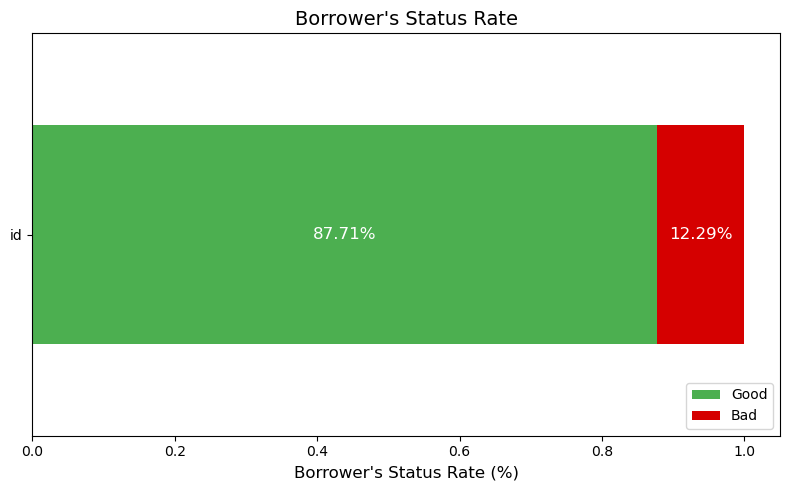

In [15]:
# Create Stacked Bar Chart Function

def plot_stacked_bar_chart(df, title, figsize):
  # create chart
  df.plot(kind='barh', stacked=True, color = ['#4CAF50', '#D50000'], width = 0.6, figsize = figsize)
  plt.title(title, fontsize=14)
  plt.xlabel("Borrower's Status Rate (%)", size=12)
  plt.legend(["Good", "Bad"], loc='lower right')

  # create annotation
  y_numbers = range(df.shape[0])
  for i in y_numbers:
    if df[0][i] == 0:
      continue
    else:
      plt.text(y = y_numbers[i], x = (df[0][i]/2),
              s = (str(round((df[0][i]*100),2))) + '%',
              size = 12, ha='center', va='center', color = 'white')
    if df[1][i] == 0:
      continue
    else:
      plt.text(y = y_numbers[i], x = 1-(df[1][i]/2),
              s = (str(round((df[1][i]*100),2))) + '%',
              size = 12, ha='center', va='center', color = 'white')

  plt.tight_layout()

good_rate = loan_viz.groupby('target').agg({'id' : 'count'}).T
good_rate = good_rate.div(good_rate.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(good_rate, 'Borrower\'s Status Rate', (8,5))

Key Takeaways:

- The high percentage (87.71%) of borrowers with a good status indicates that the bank's loan portfolio is performing well. This suggests that the bank has implemented effective lending practices, including robust credit assessments and risk management strategies, resulting in a higher rate of successful loan repayment.

- Despite the relatively low percentage (12.29%) of borrowers with a bad status, it is essential for the bank to closely monitor and manage this segment. Analyzing the characteristics and behaviors of these borrowers can provide valuable insights for improving risk assessment models, identifying early warning signs, and implementing targeted intervention strategies to minimize potential losses.

In [16]:
df['emp_title'].value_counts().iloc[:20]

Teacher                     5399
Manager                     4438
Registered Nurse            2316
RN                          2204
Supervisor                  1967
Project Manager             1624
Sales                       1624
Owner                       1527
Office Manager              1395
manager                     1312
Driver                      1296
General Manager             1263
Director                    1187
teacher                     1182
Engineer                    1049
driver                       967
Vice President               944
President                    915
owner                        856
Administrative Assistant     840
Name: emp_title, dtype: int64

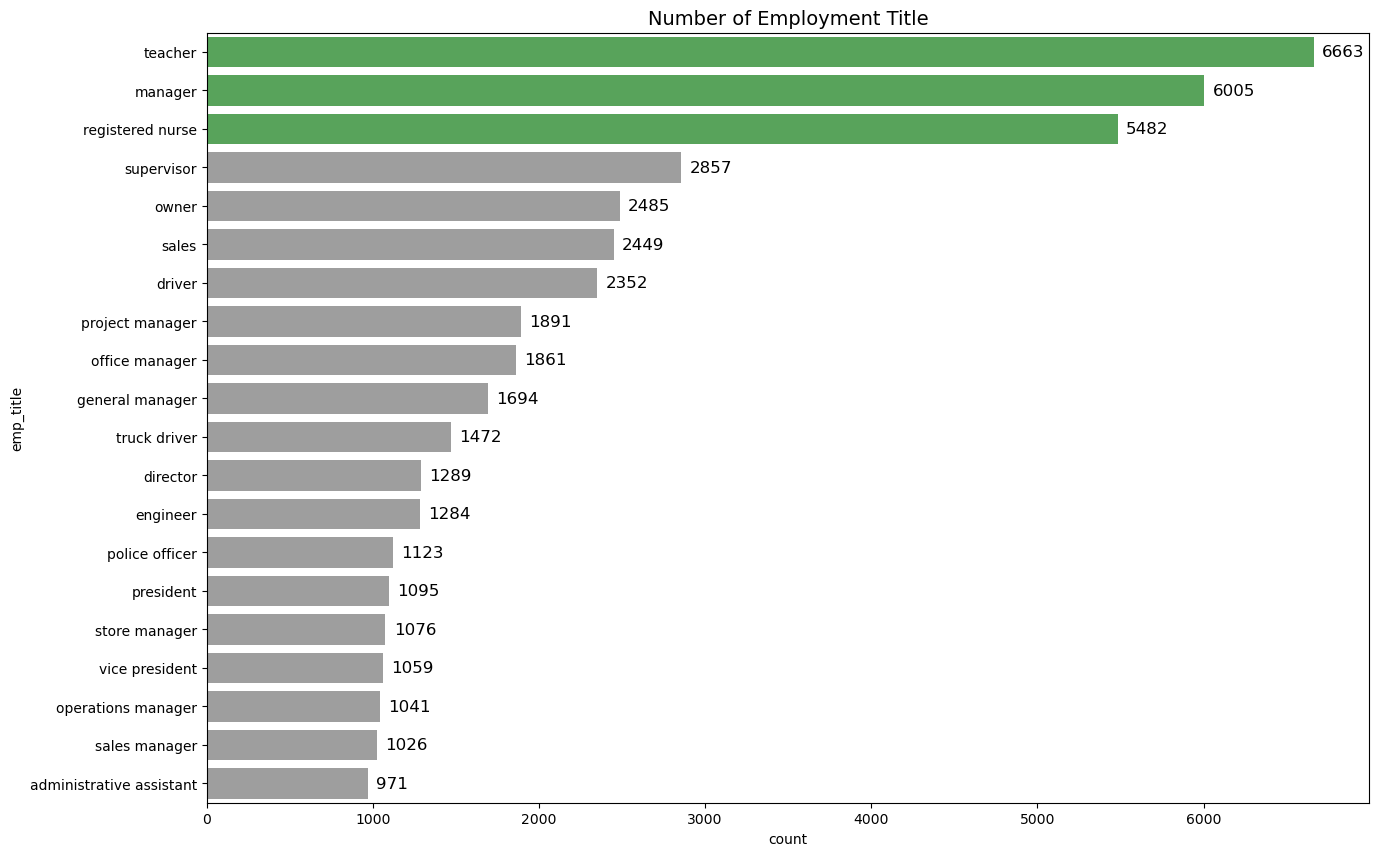

In [17]:
# Create the countplot number of emloyment type
plt.figure(figsize=(15, 10))
sns.countplot(y=df['emp_title'].replace({'RN':'Registered Nurse'}).str.lower(), palette=['#4CAF50']*3 + ['#9e9e9e']*17, order = df['emp_title'].replace({'RN':'Registered Nurse'}).str.lower().value_counts().iloc[:20].index)
plt.title('Number of Employment Title', fontsize=14)
y_numbers = range(20)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = df['emp_title'].replace({'RN':'Registered Nurse'}).str.lower().value_counts()[i]+(50),
             s = str(round(df['emp_title'].replace({'RN':'Registered Nurse'}).str.lower().value_counts()[i], 2)), size = 12, ha = 'left', va='center')
     

# Show the plot
plt.show()

Key Takeaways:

- Teachers and managers are the most common occupations among borrowers. This is likely due to the fact that these occupations tend to have higher salaries, which makes them more likely to be able to afford a mortgage.

- Registered nurses are also a common occupation among borrowers. This is likely due to the fact that the healthcare industry is growing rapidly, which is creating more job opportunities for nurses.

- Other common occupations among borrowers include supervisor, project manager, sales, owner, and office manager. These occupations are all in high demand, which makes them good borrowers.

- The data is skewed towards female-dominated occupations, with teacher and registered nurse being the two most common titles. This is likely due to the fact that women are more likely to be employed in these occupations.

In [18]:
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

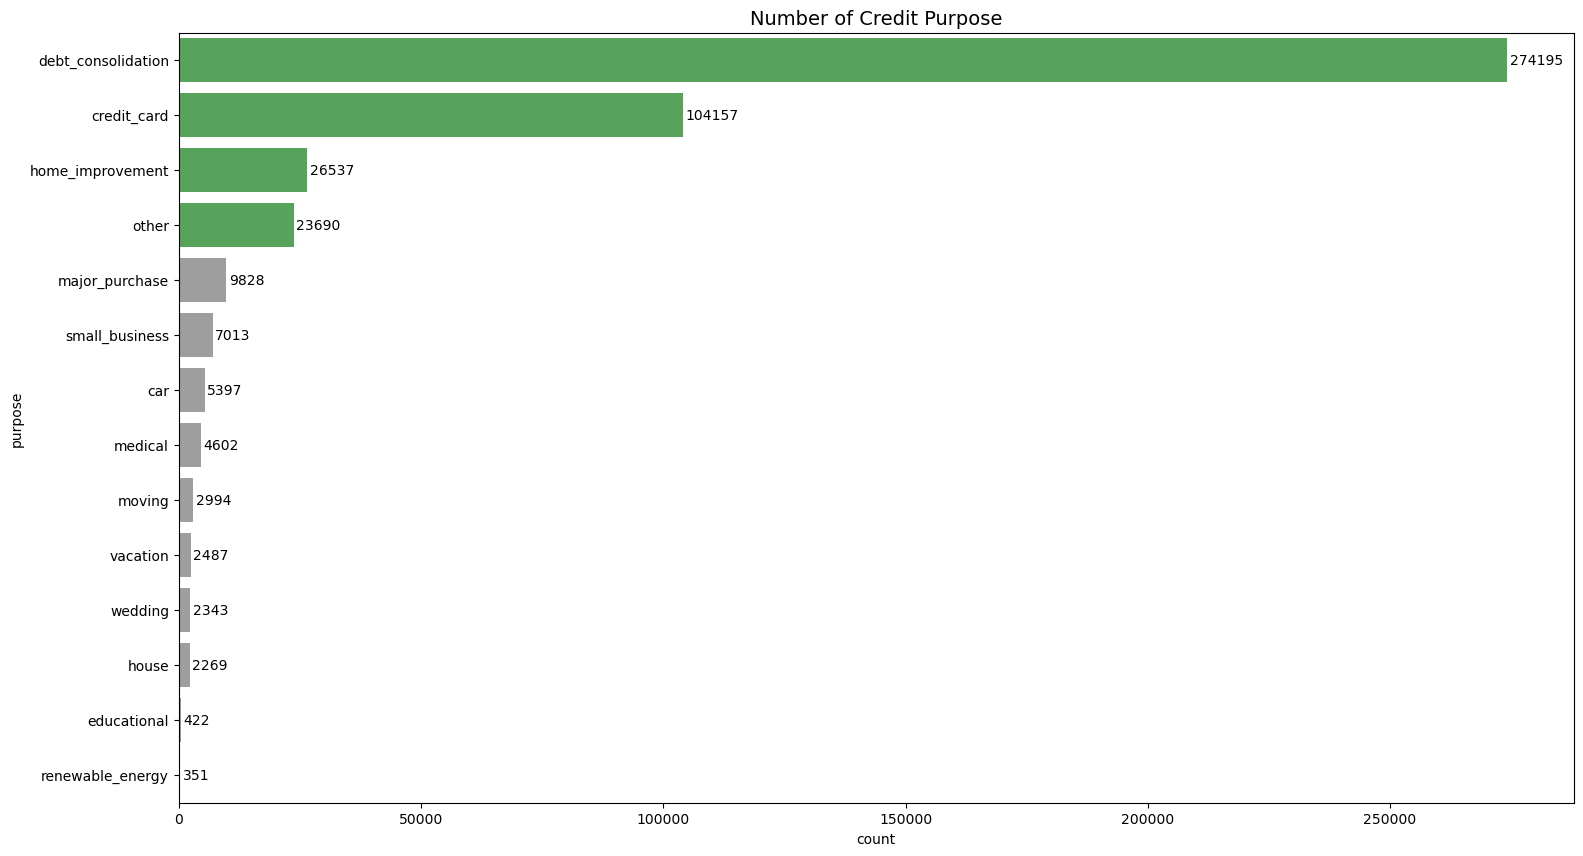

In [19]:
# Create Countplot by Loan Purpose

plt.figure(figsize=(18,10))
sns.countplot(y=df['purpose'], palette=['#4CAF50']*4 + ['#9e9e9e']*10, order = df['purpose'].value_counts().index)
plt.title('Number of Credit Purpose', fontsize=14)
y_numbers = range(14)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = df['purpose'].value_counts()[i]+(500), s = str(round(df['purpose'].value_counts()[i], 2)), size = 10, ha = 'left', va='center')
     


Key Takeaways:
- Debt consolidation is the most common credit purpose. This is likely due to the fact that many people have high-interest credit card debt, and they are looking to consolidate this debt into a single loan with a lower interest rate.

- Credit card debt is the second most common credit purpose. This is likely due to the fact that many people use credit cards for everyday purchases, and they can quickly accumulate debt if they are not careful.

- Home improvement is the third most common credit purpose. This is likely due to the fact that many people want to make improvements to their homes, but they do not have the cash on hand to do so.


In [20]:
df['grade'].value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

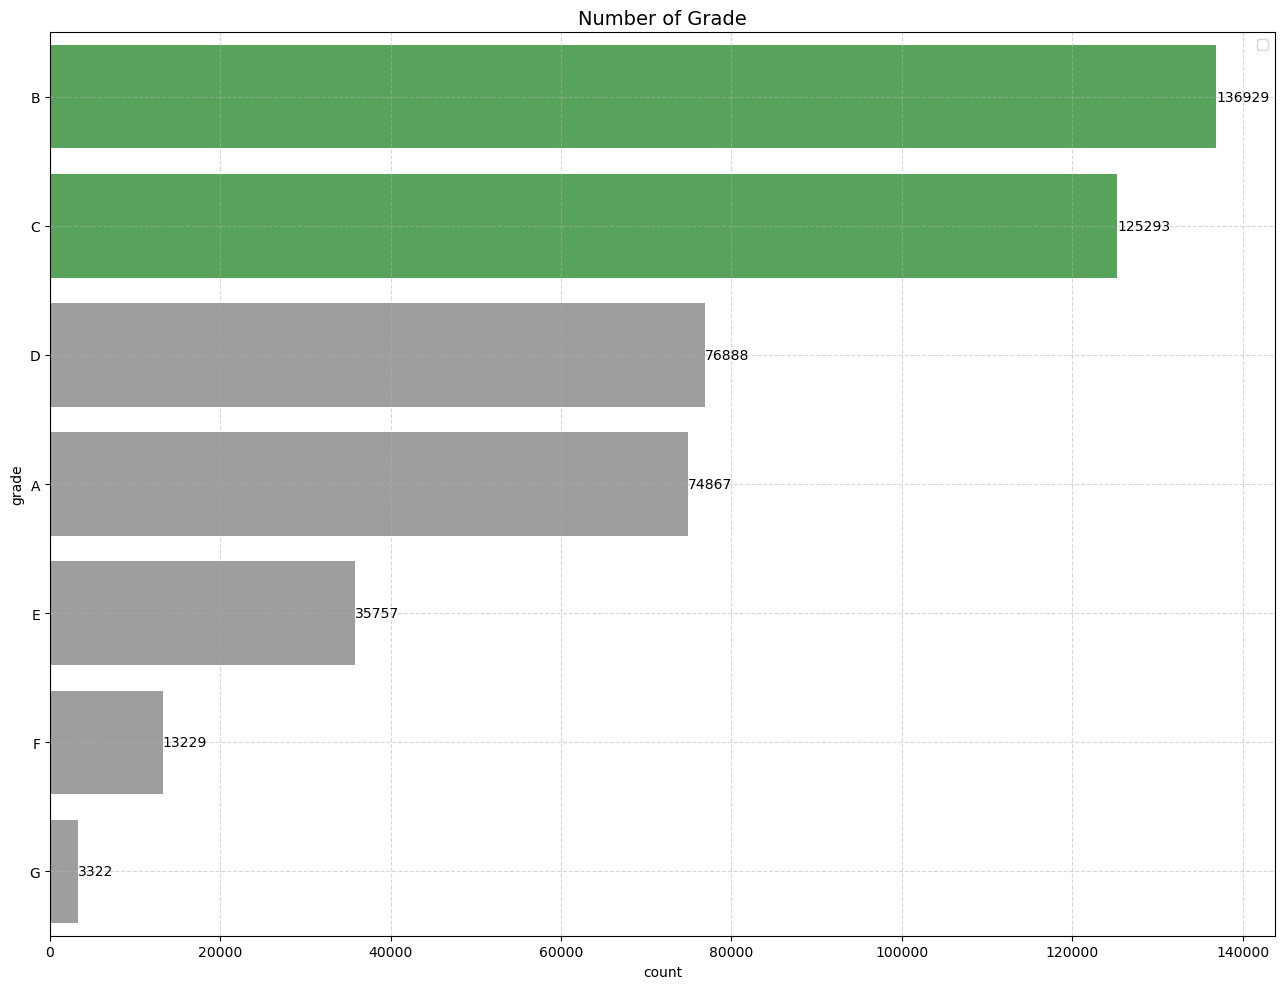

In [21]:
# Create Countplot by Grade

plt.figure(figsize=(13,10))
sns.countplot(y=df['grade'], palette=['#4CAF50']*2 + ['#9e9e9e']*5, order = df['grade'].value_counts().index)
plt.title('Number of Grade', fontsize=14)
y_numbers = range(7)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = df['grade'].value_counts()[i], s = str(round(df['grade'].value_counts()[i], 2)), size = 10, ha = 'left', va='center')
    
# Set grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Adjust plot margins to prevent labels from being cut off
plt.tight_layout()

plt.show
     

Key Takeaways:

- The distribution of borrower grades follows a typical bell-shaped curve, with a higher concentration of borrowers in the middle grades (B, C, and D) and fewer borrowers in the extreme grades (A, E, F, and G). This suggests that the majority of borrowers are considered to have moderate credit risk.

- Grades A and B represent a relatively lower credit risk compared to the other grades. These borrowers typically have a higher creditworthiness and are more likely to have a good repayment history.

- The number of borrowers decreases significantly as we move from lower-risk grades (A and B) to higher-risk grades (E, F, and G). This suggests that the lender might exercise stricter lending criteria for borrowers with higher credit risk grades.


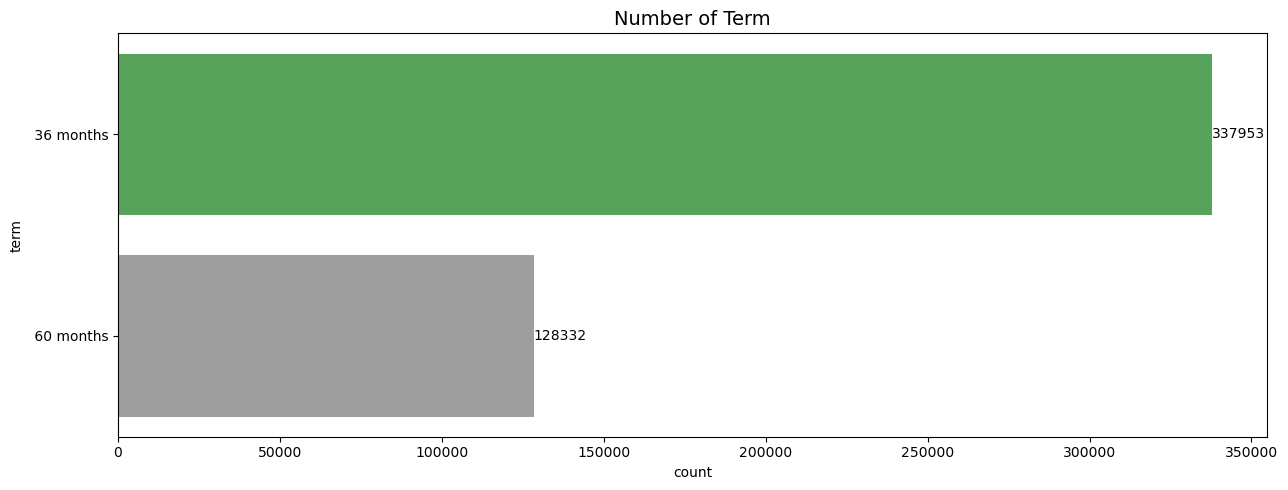

In [128]:
# Create Countplot by Term
plt.figure(figsize=(13,5))
term_order = df['term'].value_counts().index  # Menyimpan urutan yang benar dari nilai 'term'
sns.countplot(y=df['term'], palette=['#4CAF50'] + ['#9e9e9e'], order=term_order)
plt.title('Number of Term', fontsize=14)
y_numbers = range(len(term_order))
for i in y_numbers:
    plt.text(y = y_numbers[i], x = df['term'].value_counts()[i], s = str(round(df['term'].value_counts()[i], 2)), size = 10, ha = 'left', va='center')

# Adjust plot margins to prevent labels from being cut off
plt.tight_layout()

plt.show()


Key Takeaways: 

- The majority of borrowers (approximately 73%) opt for a loan term of 36 months, while around 27% choose a loan term of 60 months. This indicates a higher preference for shorter-term loans among borrowers.

- The number of borrowers who take a 36-month loan term is significantly higher compared to those who choose a 60-month loan term. This suggests that the 36-month term is more popular and attracts a larger customer base.

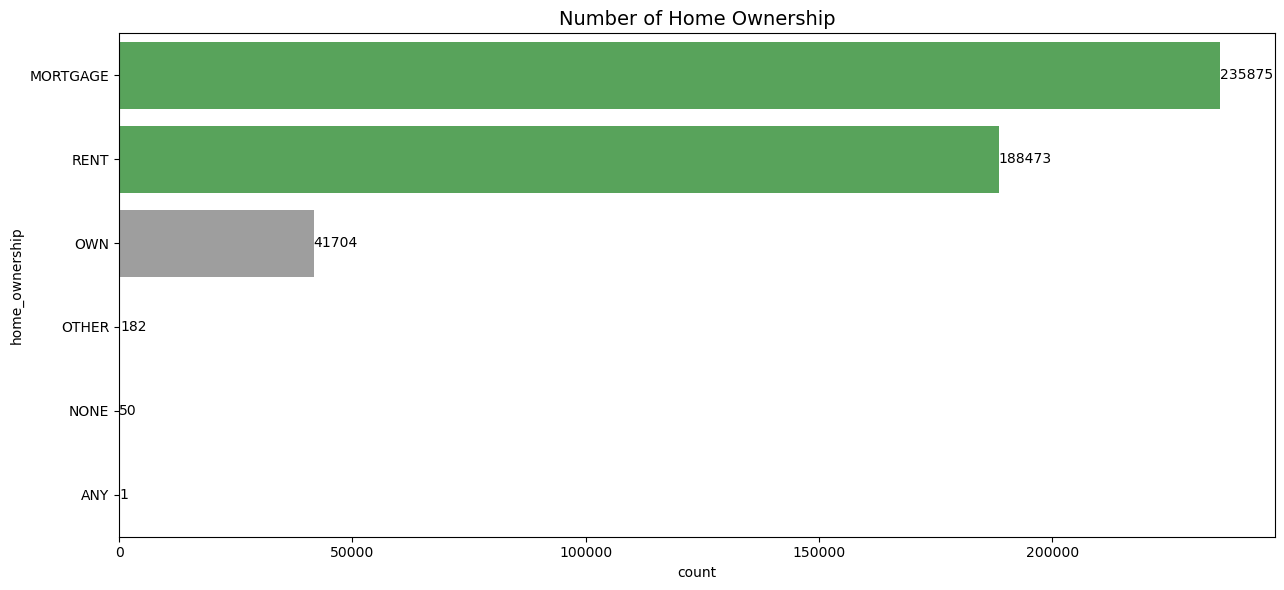

In [129]:
# Create Countplot by Home Ownership
plt.figure(figsize=(13,6))
home_ownership_order = df['home_ownership'].value_counts().index  # Get the correct order of home ownership categories
sns.countplot(y=df['home_ownership'], palette=['#4CAF50']*2 + ['#9e9e9e']*4, order=home_ownership_order)
plt.title('Number of Home Ownership', fontsize=14)
y_numbers = range(len(home_ownership_order))
for i in y_numbers:
    plt.text(y = y_numbers[i], x = df['home_ownership'].value_counts()[i], s = str(round(df['home_ownership'].value_counts()[i], 2)), size = 10, ha = 'left', va='center')

# There is no need to add a legend since no legend elements are specified

# Adjust plot margins to prevent labels from being cut off
plt.tight_layout()

plt.show()


Key Takeaways:

- The largest number of borrowers, 235,875, have a mortgage as their homeownership status. This indicates that a significant portion of borrowers in the dataset are homeowners who have obtained a mortgage to finance their property.

- The second most common homeownership status is "Rent" with 188,473 borrowers. This suggests that a considerable number of borrowers are renting their homes instead of owning them.

- There are 41,704 borrowers who own their homes, indicating that a smaller portion of the dataset consists of homeowners who have fully paid off their properties or have acquired them without a mortgage.

- A negligible number of borrowers, 182, have an "Other" homeownership status. This category might include unique or unconventional forms of homeownership not covered by the other categories.

- A very small number of borrowers, 50, have "None" as their homeownership status. This suggests that these borrowers might not currently own or rent a property.

- There is one borrower in the dataset with an "Any" homeownership status. The meaning and context of this category may require further investigation.

### Bivariate Analysis

In [33]:
# Create a crosstab of grade and target
percentage_by_grade = pd.crosstab(loan_viz['grade'], loan_viz['target'])

# Calculate the bad percentage by grade
percentage_by_grade = percentage_by_grade.div(percentage_by_grade.sum(axis=1).astype(float), axis=0).sort_values(by=1)

percentage_by_grade

target,0,1
grade,,
A,0.957,0.043
B,0.913,0.087
C,0.871,0.129
D,0.827,0.173
E,0.777,0.223
F,0.727,0.273
G,0.665,0.335


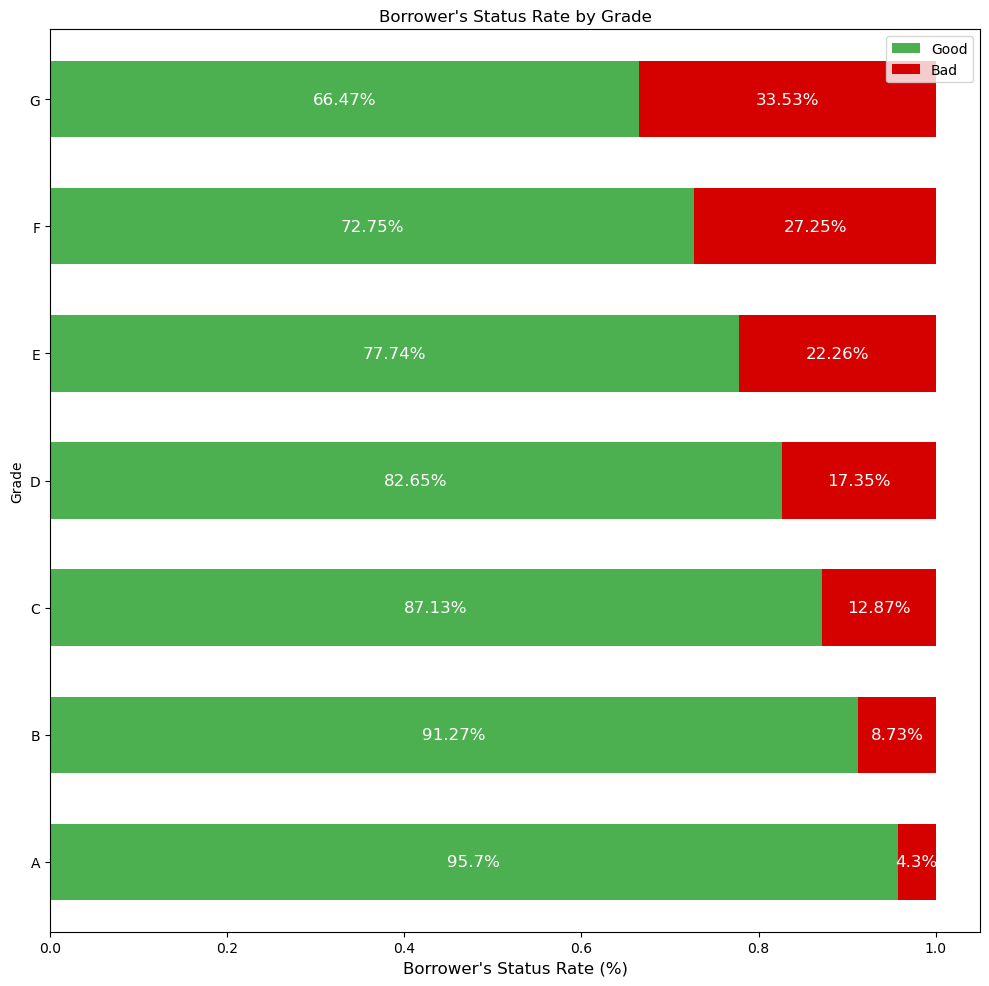

<Figure size 1000x1200 with 0 Axes>

In [34]:
# Create a plot stacked bar chart of grade and target
plot_stacked_bar_chart(percentage_by_grade, 'Borrower\'s Status Rate', (10,10))

# Create a title for the chart
plt.title('Borrower\'s Status Rate by Grade')

# Add labels to the axes
plt.xlabel('Borrower\'s Status Rate (%)')
plt.ylabel('Grade')

# Create a more informative legend
plt.legend(['Good', 'Bad'])

# Change the size of the chart
plt.figure(figsize=(10, 12))

# Adjust plot margins to prevent labels from being cut off
plt.tight_layout()

# Show the chart
plt.show()

Key Takeaways:

- Borrowers with a grade of A are the least likely to default on their loans. Only 4.3% of borrowers with a grade of A defaulted on their loans, while 95.7% were good borrowers.

- Borrowers with a grade of G are the most likely to default on their loans. 33.5% of borrowers with a grade of G defaulted on their loans, while only 66.5% were good borrowers.

- There is a clear trend of increasing default rates as the grade decreases. This suggests that borrowers with lower grades are more likely to default on their loans.

- The difference in default rates between grades is significant. For example, the difference in default rates between borrowers with a grade of A and borrowers with a grade of G is 29.2%.

In [35]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in column_date:
  # split to individual columns
  tmp = loan_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data_viz[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


Key Takeaways: 

I chose these data because they contain date information that I can analyze further to assess the borrower's risk of default.

- The issue date shows how long the borrower has been making timely payments on their loans.

- The last payment date shows if the borrower is having difficulty making payments.

- The last credit pull date shows if the borrower has recently applied for other loans or credit cards.

- The earliest credit line date shows how long the borrower has been building their credit.


In [36]:
for col in column_date:
    # Define the column names
    col_month = f'{col}_month'
    col_year = f'{col}_year'
    col_update = f'{col}_update'

    # Split the date column into month and year
    loan_viz[[col_month, col_year]] = loan_viz[col].str.split('-', expand=True)

    # Add the appropriate century to the year column
    loan_viz[col_year] = loan_viz[col_year].apply(lambda x: f'20{x}' if pd.notnull(x) and int(x) <= 16 else f'19{x}')

    # Combine the month and year columns to update the date format
    loan_viz[col_update] = loan_viz[col_month] + '-' + loan_viz[col_year]

    # Convert the 'year' column to numeric
    loan_viz[col_year] = pd.to_numeric(loan_viz[col_year], errors='coerce')

    # Drop the original date column
    loan_viz.drop(col, axis=1, inplace=True)

    print(np.sort(loan_viz[col_year].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


In [37]:
loan_viz.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target,issue_d_month,issue_d_year,issue_d_update,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_d_update,last_credit_pull_d_month,last_credit_pull_d_year,last_credit_pull_d_update,earliest_cr_line_month,earliest_cr_line_year,earliest_cr_line_update
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,171.620,NaN,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011,Dec-2011,Jan,2015.000,Jan-2015,Jan,2016.000,Jan-2016,Jan,1985.000,Jan-1985


In [38]:
loan_viz[['issue_d_month', 'issue_d_year', 'issue_d_update', 'last_pymnt_d_month', 'last_pymnt_d_year', 'last_pymnt_d_update', 'last_credit_pull_d_month', 'last_credit_pull_d_year', 'last_credit_pull_d_update', 'earliest_cr_line_month', 'earliest_cr_line_year', 'earliest_cr_line_update']].head(5)


,issue_d_month,issue_d_year,issue_d_update,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_d_update,last_credit_pull_d_month,last_credit_pull_d_year,last_credit_pull_d_update,earliest_cr_line_month,earliest_cr_line_year,earliest_cr_line_update
0,Dec,2011,Dec-2011,Jan,2015.000,Jan-2015,Jan,2016.000,Jan-2016,Jan,1985.000,Jan-1985
1,Dec,2011,Dec-2011,Apr,2013.000,Apr-2013,Sep,2013.000,Sep-2013,Apr,1999.000,Apr-1999
2,Dec,2011,Dec-2011,Jun,2014.000,Jun-2014,Jan,2016.000,Jan-2016,Nov,2001.000,Nov-2001
3,Dec,2011,Dec-2011,Jan,2015.000,Jan-2015,Jan,2015.000,Jan-2015,Feb,1996.000,Feb-1996
4,Dec,2011,Dec-2011,Jan,2016.000,Jan-2016,Jan,2016.000,Jan-2016,Jan,1996.000,Jan-1996


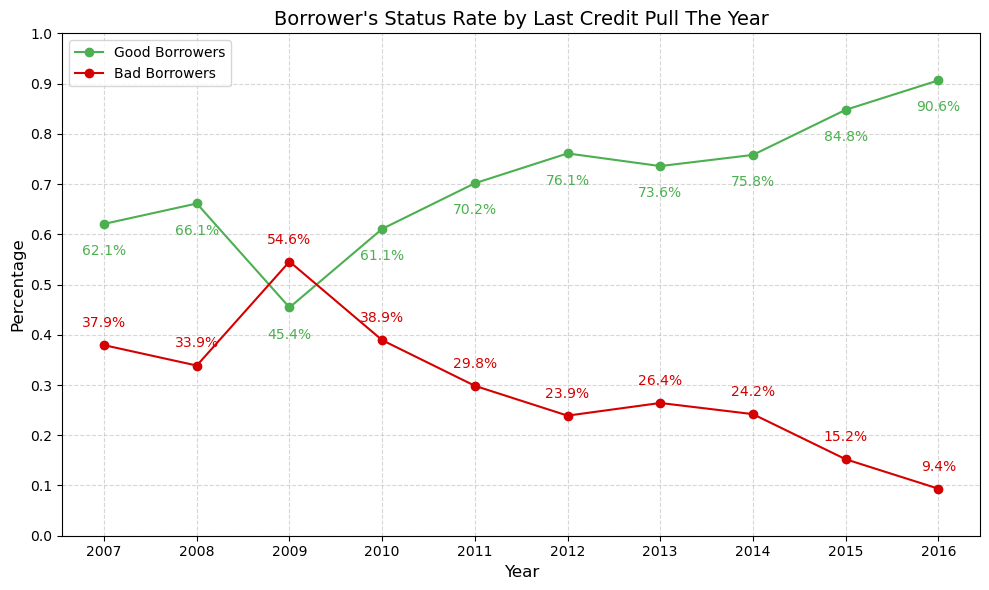

In [39]:
last_credit_pull_d_year = pd.crosstab(loan_viz['last_credit_pull_d_year'], loan_viz['target'])
last_credit_pull_d_year = last_credit_pull_d_year.div(last_credit_pull_d_year.sum(axis=1).astype(float), axis=0)
last_credit_pull_d_year.index = np.arange(2007, 2017)

# Calculate the percentage of good and bad borrowers for each year
good_percentage = last_credit_pull_d_year[0] / (last_credit_pull_d_year[0] + last_credit_pull_d_year[1])
bad_percentage = last_credit_pull_d_year[1] / (last_credit_pull_d_year[0] + last_credit_pull_d_year[1])

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(last_credit_pull_d_year.index, good_percentage, marker='o', linestyle='-', color='#4CAF50', label='Good Borrowers')
plt.plot(last_credit_pull_d_year.index, bad_percentage, marker='o', linestyle='-', color='#D50000', label='Bad Borrowers')

# Add labels with percentage values
for x, y in zip(last_credit_pull_d_year.index, good_percentage):
    plt.text(x, y - 0.04, f'{y:.1%}', ha='center', va='top', color='#4CAF50')

for x, y in zip(last_credit_pull_d_year.index, bad_percentage):
    plt.text(x, y + 0.03, f'{y:.1%}', ha='center', va='bottom', color='#D50000')

# Set the x-axis and y-axis labels
plt.xlabel('Year', size=12)
plt.ylabel('Percentage', size=12)

# Set the title
plt.title("Borrower's Status Rate by Last Credit Pull The Year", fontsize=14)

# Set the tick labels for x-axis and y-axis
plt.xticks(np.arange(2007, 2017))
plt.yticks(np.arange(0, 1.1, 0.1))

# Set grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Adjust plot margins to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


Key Takeaways:

- The percentage of good borrowers has generally remained higher than the percentage of bad borrowers across the years from 2007 to 2016. This indicates that, on average, a higher proportion of borrowers have been classified as good borrowers.

- There is a noticeable improvement in borrower quality from 2007 to 2009, as the percentage of bad borrowers decreases significantly. However, from 2010 onwards, the percentage of bad borrowers shows a slight increase, suggesting a potential deterioration in borrower quality during that period.

- After 2009, the percentage of bad borrowers remains relatively stable, fluctuating within a narrow range. This stability indicates a level of consistency in the borrower's repayment behavior, which can be seen as a positive aspect for lenders.

- In the later years, specifically from 2015 to 2016, there is a slight increase in the percentage of bad borrowers. This trend suggests a potential increase in risk for lenders, indicating the need for closer scrutiny and monitoring of borrowers during those years.

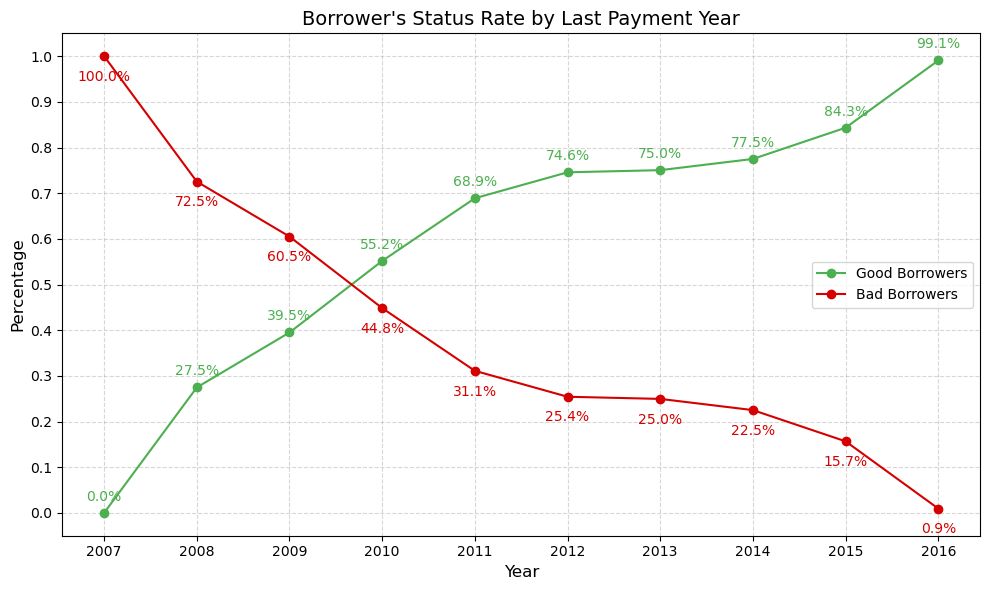

In [40]:
status_rate_by_year = pd.crosstab(loan_viz['last_pymnt_d_year'], loan_viz['target'])
status_rate_by_year = status_rate_by_year.div(status_rate_by_year.sum(axis=1).astype(float), axis=0)
status_rate_by_year.index = np.arange(2007, 2017)

# Calculate the percentage of good and bad borrowers for each year
good_percentage = status_rate_by_year[0] / (status_rate_by_year[0] + status_rate_by_year[1])
bad_percentage = status_rate_by_year[1] / (status_rate_by_year[0] + status_rate_by_year[1])

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(status_rate_by_year.index, good_percentage, marker='o', linestyle='-', color='#4CAF50', label='Good Borrowers')
plt.plot(status_rate_by_year.index, bad_percentage, marker='o', linestyle='-', color='#D50000', label='Bad Borrowers')

# Add labels with percentage values
for x, y in zip(status_rate_by_year.index, good_percentage):
    plt.text(x, y + 0.02, f'{y:.1%}', ha='center', va='bottom', color='#4CAF50')

for x, y in zip(status_rate_by_year.index, bad_percentage):
    plt.text(x, y - 0.03, f'{y:.1%}', ha='center', va='top', color='#D50000')

# Set the x-axis and y-axis labels
plt.xlabel('Year', size=12)
plt.ylabel('Percentage', size=12)

# Set the title
plt.title("Borrower's Status Rate by Last Payment Year", fontsize=14)

# Set the tick labels for x-axis and y-axis
plt.xticks(np.arange(2007, 2017))
plt.yticks(np.arange(0, 1.1, 0.1))

# Set grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Adjust plot margins to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


key Takeaways:

- There is a decreasing trend in the percentage of borrowers experiencing issues (bad borrowers) from 2007 to 2016. This indicates an overall improvement in the quality of borrowers over time.

- The percentage of borrowers who successfully make payments (good borrowers) tends to increase each year. This suggests that the number of borrowers effectively managing their repayment obligations is growing over time.

- here is a significant difference between the percentage of good borrowers and bad borrowers in 2016. The percentage of good borrowers is 99.1% while the percentage of bad borrowers is only 0.9%. This highlights a substantial improvement in borrowers' ability to manage payment obligations and reduce the risk of default in that particular year.

- A significant increase in the percentage of good borrowers is observed from 2012 to 2016. This indicates the success of strategies or policies implemented by the bank in assessing borrower eligibility and risk.


##### Interest Rate

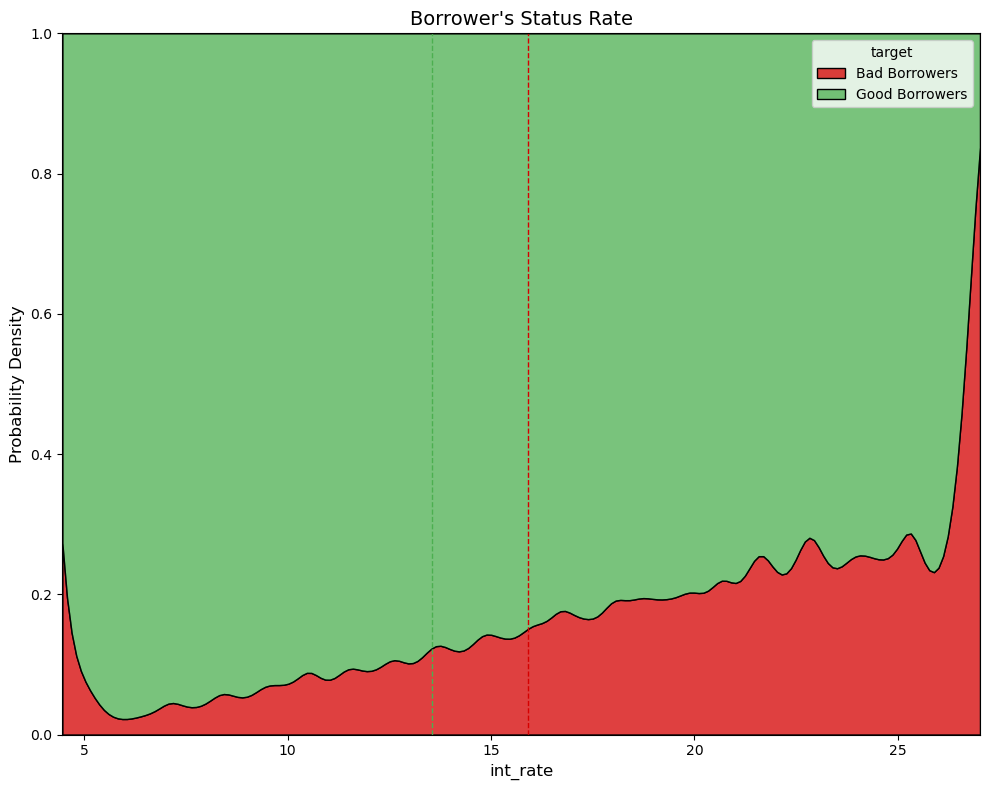

In [41]:
def plot_kde_proba_chart(df, x, hue, title, figsize):
    plt.figure(figsize=figsize)
    
    # Customize the color palette
    colors = ['#4CAF50', '#D50000']
    
    # Create the KDE plot
    sns.kdeplot(data = df, x = x, hue = hue, multiple='fill', palette=colors)
    
    # Add a vertical line at the mean of 'int_rate' for each target category
    for target_val, color in zip(df[hue].unique(), colors):
        mean_val = df[df[hue] == target_val][x].mean()
        plt.axvline(mean_val, color=color, linestyle='--', linewidth=1)
    
    # Set the x-axis and y-axis labels
    plt.xlabel(x, size=12)
    plt.ylabel('Probability Density', size=12)
    
    # Set the title
    plt.title(title, fontsize=14)
    
    # Add a legend with meaningful labels
    legend_labels = ['Bad Borrowers', 'Good Borrowers']
    plt.legend(title=hue, labels=legend_labels)
    
    
    # Adjust plot margins
    plt.tight_layout()
    
    # Show the plot
    plt.show()

plot_kde_proba_chart(df=loan_viz, x='int_rate', hue='target', title="Borrower's Status Rate", figsize=(10, 8))


Key Takeaways:

- Borrowers with high-interest rates have a higher probability to have a bad loan status than those with a low-interest rate.

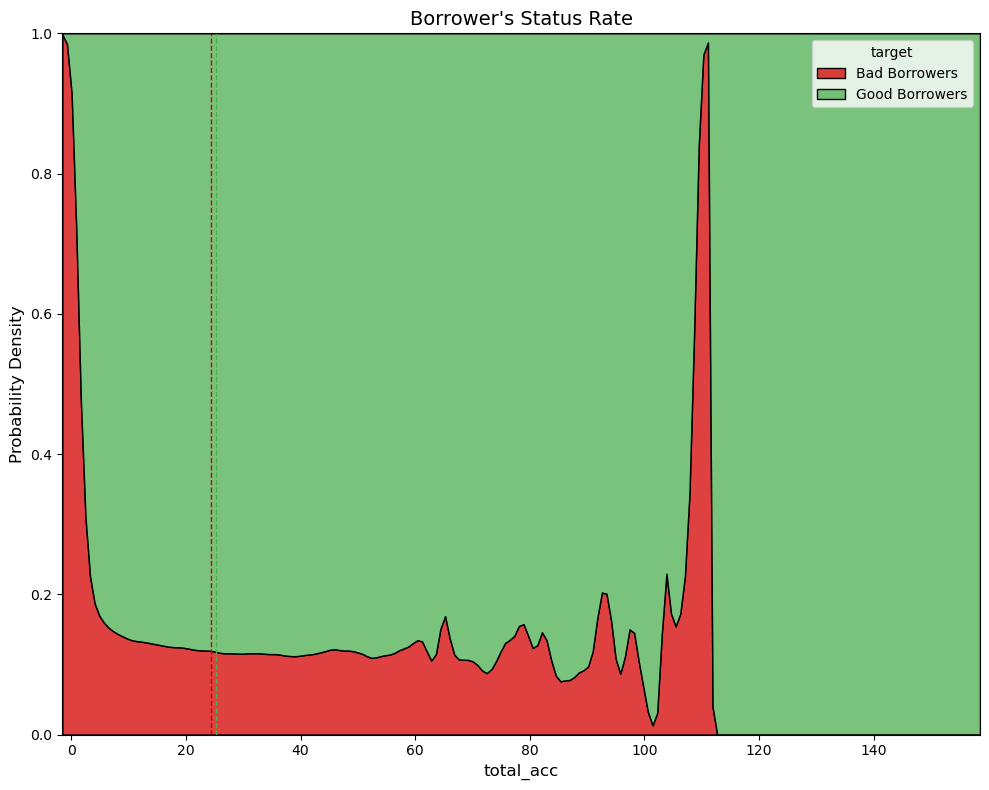

In [42]:
plot_kde_proba_chart(df=loan_viz, x='total_acc', hue='target', title="Borrower's Status Rate", figsize=(10, 8))

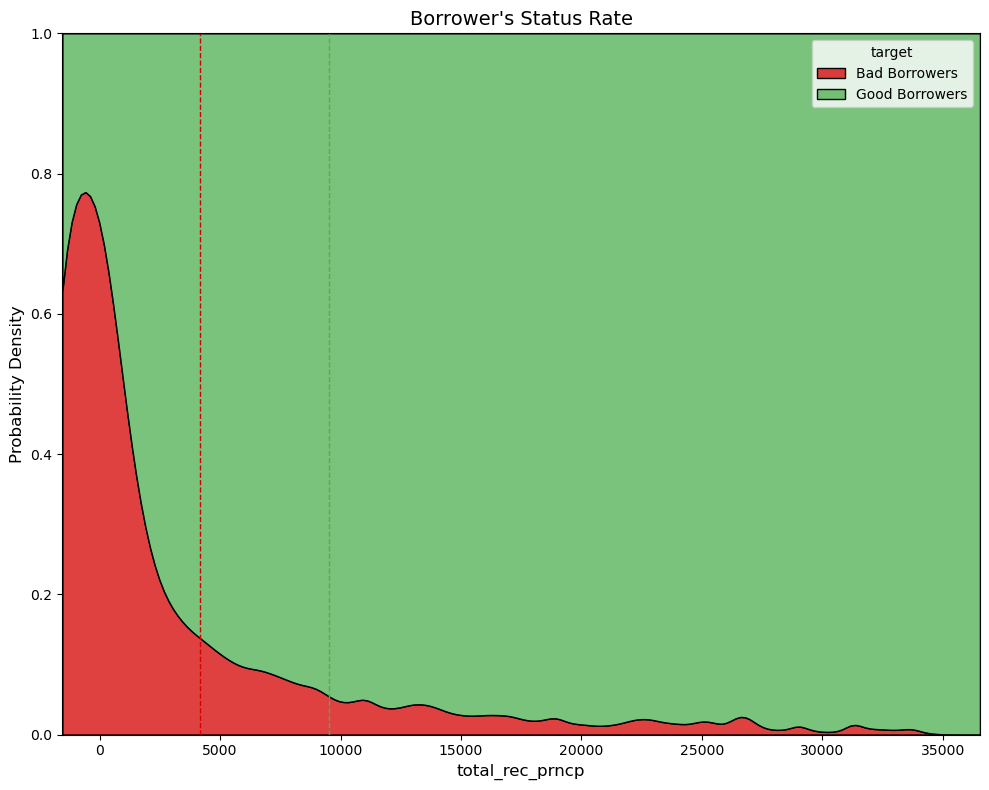

In [43]:
plot_kde_proba_chart(df=loan_viz, x='total_rec_prncp', hue='target', title="Borrower's Status Rate", figsize=(10, 8))

Key Takeaways:

- Borrowers with low total received principal have a higher probability to have a bad loan status than those with a high total received principal.

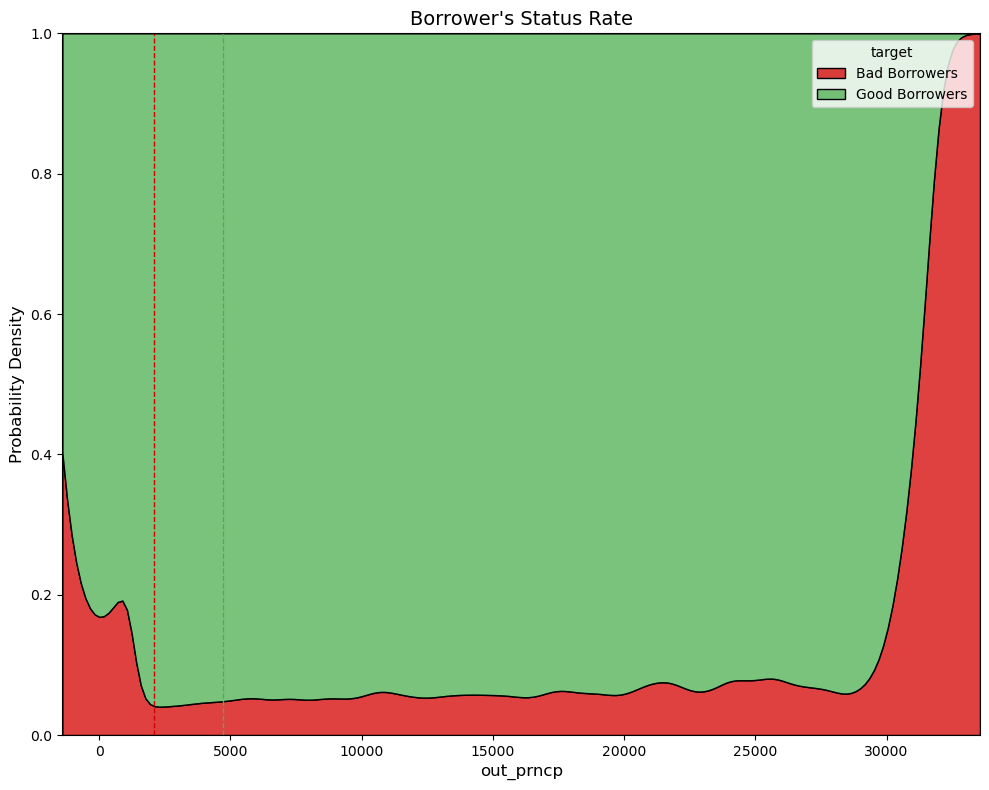

In [44]:
plot_kde_proba_chart(df=loan_viz, x='out_prncp', hue='target', title="Borrower's Status Rate", figsize=(10, 8))

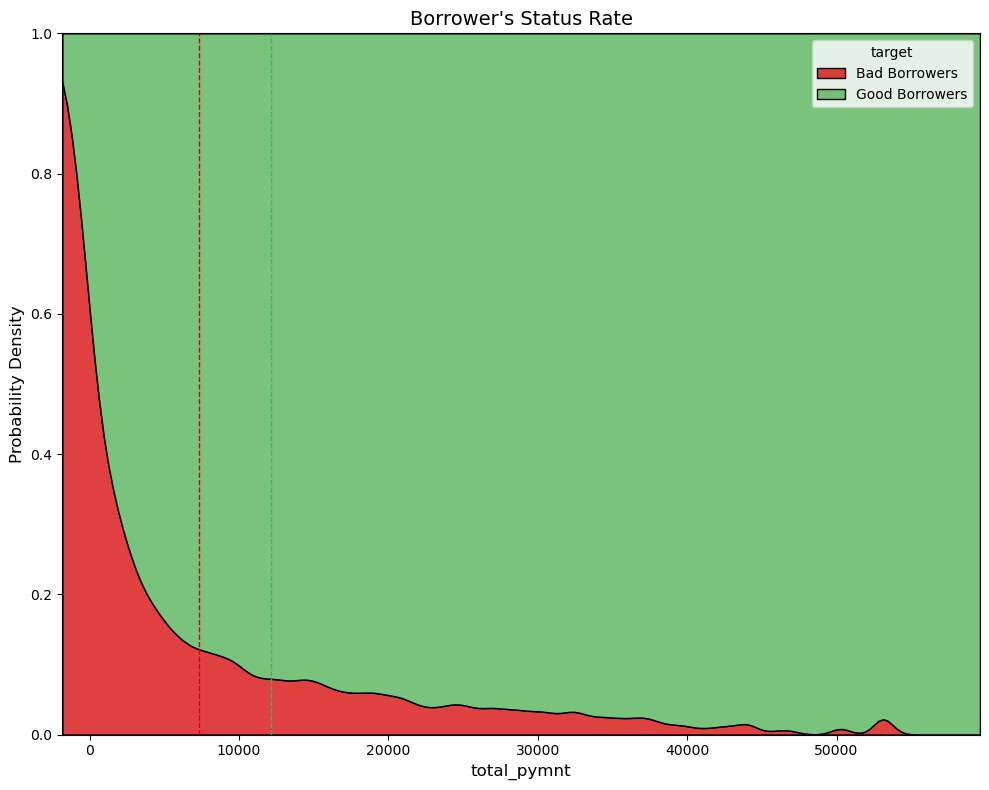

In [45]:
plot_kde_proba_chart(df=loan_viz, x='total_pymnt', hue='target', title="Borrower's Status Rate", figsize=(10, 8))

Key Takeaways:

- Borrowers with low totalpayment have a higher probability to have a bad loan status than those with a high total payment.

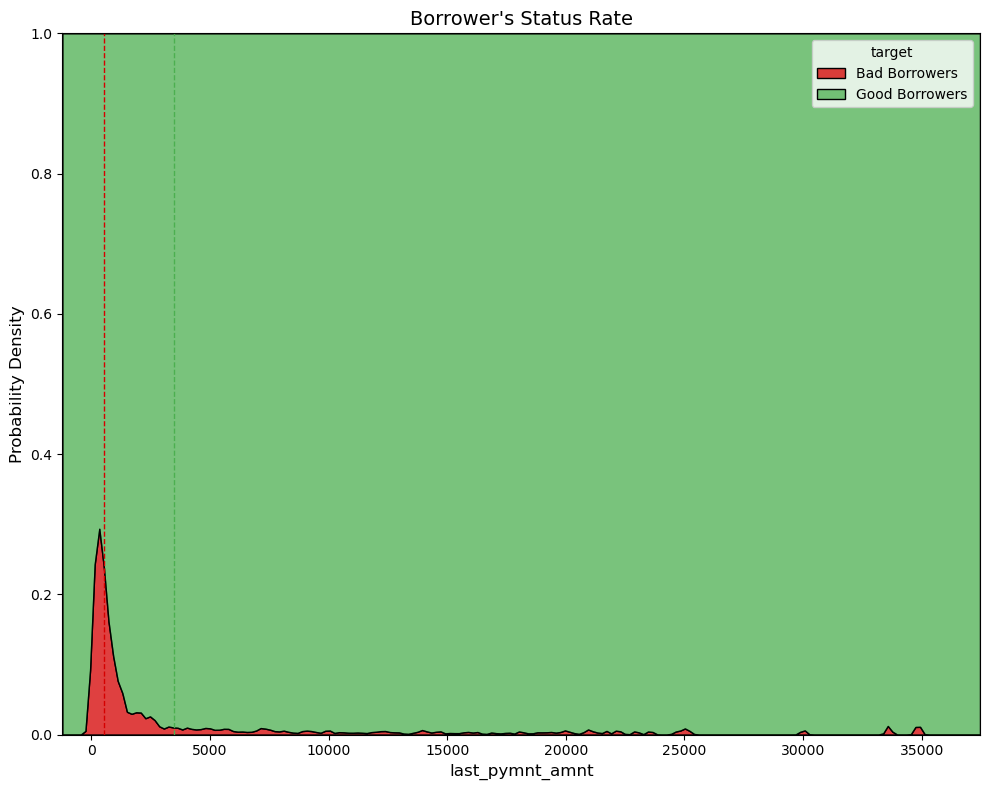

In [46]:
plot_kde_proba_chart(df=loan_viz, x='last_pymnt_amnt', hue='target', title="Borrower's Status Rate", figsize=(10, 8))

## Feature Selection

#### Define Target

In [47]:
# List of good loan statuses
good_status = ['Fully Paid', 'Current']

# Create a copy of the data
loan_model = df.copy()

# Create a new column 'target' based on loan status
# If loan status is in good_status, assign 0 to 'target', otherwise assign 1
loan_model['target'] = loan_model['loan_status'].apply(lambda x: 0 if x in good_status else 1)

In [48]:
loan_model['target'].value_counts()

0    408965
1     57320
Name: target, dtype: int64

Key Takeaways:

After flagging bad/good loans, it can be seen that the number of individuals marked as bad loans is much less than good loans. This causes this problem to become an imbalanced dataset problem.

### Split Data

In [49]:
# Seperate target variabel from feature
X = loan_model.drop("target", axis=1)
y = loan_model["target"]  # drop kolom 'Revenue' dari X

# Split Data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Show train and test data 
print("Number of rows and columns of training data:", X_train.shape)
print("Number of rows and columns of test data:", X_test.shape)

Number of rows and columns of training data: (373028, 74)
Number of rows and columns of test data: (93257, 74)


## Preprocessing

In [50]:
# Check Duplicated Data

print(f'Number of duplicated data = {loan_model.duplicated().sum()}')

Number of duplicated data = 0


### Drop Feature

In [51]:
cols_to_drop = [
    
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'application_type'
    , 'title'
    , 'emp_title'
    , 'addr_state'
    , 'loan_status'
    , 'policy_code'
    
    # expert judgment
    , 'sub_grade'
]

In [52]:
loan_model = loan_model.drop(cols_to_drop, axis = 1)

In [53]:
loan_model.head(1).T

,0
loan_amnt,5000
funded_amnt,5000
funded_amnt_inv,4975.000
term,36 months
int_rate,10.650
installment,162.870
grade,B
emp_length,10+ years
home_ownership,RENT
annual_inc,24000.000


### Feature Engineering

#### Employment Length

In [54]:
loan_model['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [55]:
loan_model['emp_length'] = loan_model['emp_length'].str.replace('\+ years', '')
loan_model['emp_length'] = loan_model['emp_length'].str.replace('< 1 year', str(0))
loan_model['emp_length'] = loan_model['emp_length'].str.replace(' years', '')
loan_model['emp_length'] = loan_model['emp_length'].str.replace(' year', '')
loan_model['emp_length'] = loan_model['emp_length'].astype(float)

In [56]:
loan_model['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

#### Term

In [57]:
loan_model['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [58]:
loan_model['term'] = loan_model['term'].str.replace(' months', '')
loan_model['term'] = loan_model['term'].astype(float)

In [59]:
loan_model['term'].unique()

array([36., 60.])

### Earliest Credit Line


Modified earliest_cr_line from month-year format to calculate how much time has passed since that time. To do this, it is common to use reference date = today. However, because this dataset is a 2007-2016 dataset, it will be more relevant to use a reference date around 2017. In this example, I use 2017-12-01 as the reference date.

In [60]:
loan_model['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [61]:
loan_model['earliest_cr_line_date'] = pd.to_datetime(loan_model['earliest_cr_line'], format='%b-%y')
loan_model['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [62]:
loan_model['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_model['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_model['mths_since_earliest_cr_line'].head()

0   395.000
1   224.000
2   193.000
3   262.000
4   263.000
Name: mths_since_earliest_cr_line, dtype: float64

In [63]:
loan_model['mths_since_earliest_cr_line'].describe()

count   466256.000
mean       239.482
std         93.975
min       -612.000
25%        183.000
50%        225.000
75%        285.000
max        587.000
Name: mths_since_earliest_cr_line, dtype: float64

In [64]:
loan_model[loan_model['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.000
1770,Sep-68,2068-09-01,-609.000
2799,Sep-64,2064-09-01,-561.000
3282,Sep-67,2067-09-01,-597.000
3359,Feb-65,2065-02-01,-566.000


Key Takeaways:

- It turns out that the negative value appears because the Python function misinterprets the year 62 to be the year 2062, when it should be 1962.

- To overcome this, we can do further preprocessing if we want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since I know here that negative values are old data (1900s), it still makes sense if I change these values to the largest value.

In [65]:
loan_model.loc[loan_model['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = loan_model['mths_since_earliest_cr_line'].max()

In [66]:
loan_model.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### Issue Date

In [67]:
loan_model['issue_d_date'] = pd.to_datetime(loan_model['issue_d'], format='%b-%y')
loan_model['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_model['issue_d_date']) / np.timedelta64(1, 'M')))

In [68]:
loan_model['mths_since_issue_d'].sample(5)

100399   52.000
168685   58.000
286781   38.000
202093   63.000
25257    87.000
Name: mths_since_issue_d, dtype: float64

In [69]:
loan_model['mths_since_issue_d'].describe()

count   466285.000
mean        51.255
std         14.340
min         36.000
25%         41.000
50%         47.000
75%         57.000
max        126.000
Name: mths_since_issue_d, dtype: float64

In [70]:
loan_model.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### Last Payment Date

In [71]:
loan_model['last_pymnt_d_date'] = pd.to_datetime(loan_model['last_pymnt_d'], format='%b-%y')
loan_model['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_model['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [72]:
loan_model['mths_since_last_pymnt_d'].sample(5)

11668    39.000
431326   23.000
175112   51.000
306498   23.000
25643    49.000
Name: mths_since_last_pymnt_d, dtype: float64

In [73]:
loan_model['mths_since_last_pymnt_d'].describe()


count   465909.000
mean        31.294
std         12.810
min         23.000
25%         23.000
50%         24.000
75%         35.000
max        120.000
Name: mths_since_last_pymnt_d, dtype: float64

In [74]:
loan_model.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### Next Payment Date

In [75]:
loan_model['next_pymnt_d_date'] = pd.to_datetime(loan_model['next_pymnt_d'], format='%b-%y')
loan_model['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_model['next_pymnt_d_date']) / np.timedelta64(1, 'M')))


In [76]:
loan_model['mths_since_next_pymnt_d'].sample(5)

328349      NaN
103948      NaN
410364   23.000
214594      NaN
40176    50.000
Name: mths_since_next_pymnt_d, dtype: float64

In [77]:

loan_model['mths_since_next_pymnt_d'].describe()

count   239071.000
mean        22.738
std          6.082
min         21.000
25%         22.000
50%         22.000
75%         22.000
max        120.000
Name: mths_since_next_pymnt_d, dtype: float64

In [78]:
loan_model.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### Last Credit Pull Date

In [79]:
loan_model['last_credit_pull_d_date'] = pd.to_datetime(loan_model['last_credit_pull_d'], format='%b-%y')
loan_model['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_model['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [80]:
loan_model['mths_since_last_credit_pull_d'].sample(5)

287974   24.000
420150   23.000
277343   23.000
34666    88.000
36443    31.000
Name: mths_since_last_credit_pull_d, dtype: float64

In [81]:
loan_model['mths_since_last_credit_pull_d'].describe()

count   466243.000
mean        27.046
std          9.636
min         23.000
25%         23.000
50%         23.000
75%         25.000
max        127.000
Name: mths_since_last_credit_pull_d, dtype: float64

In [82]:
loan_model.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

### Numerical Feature Check

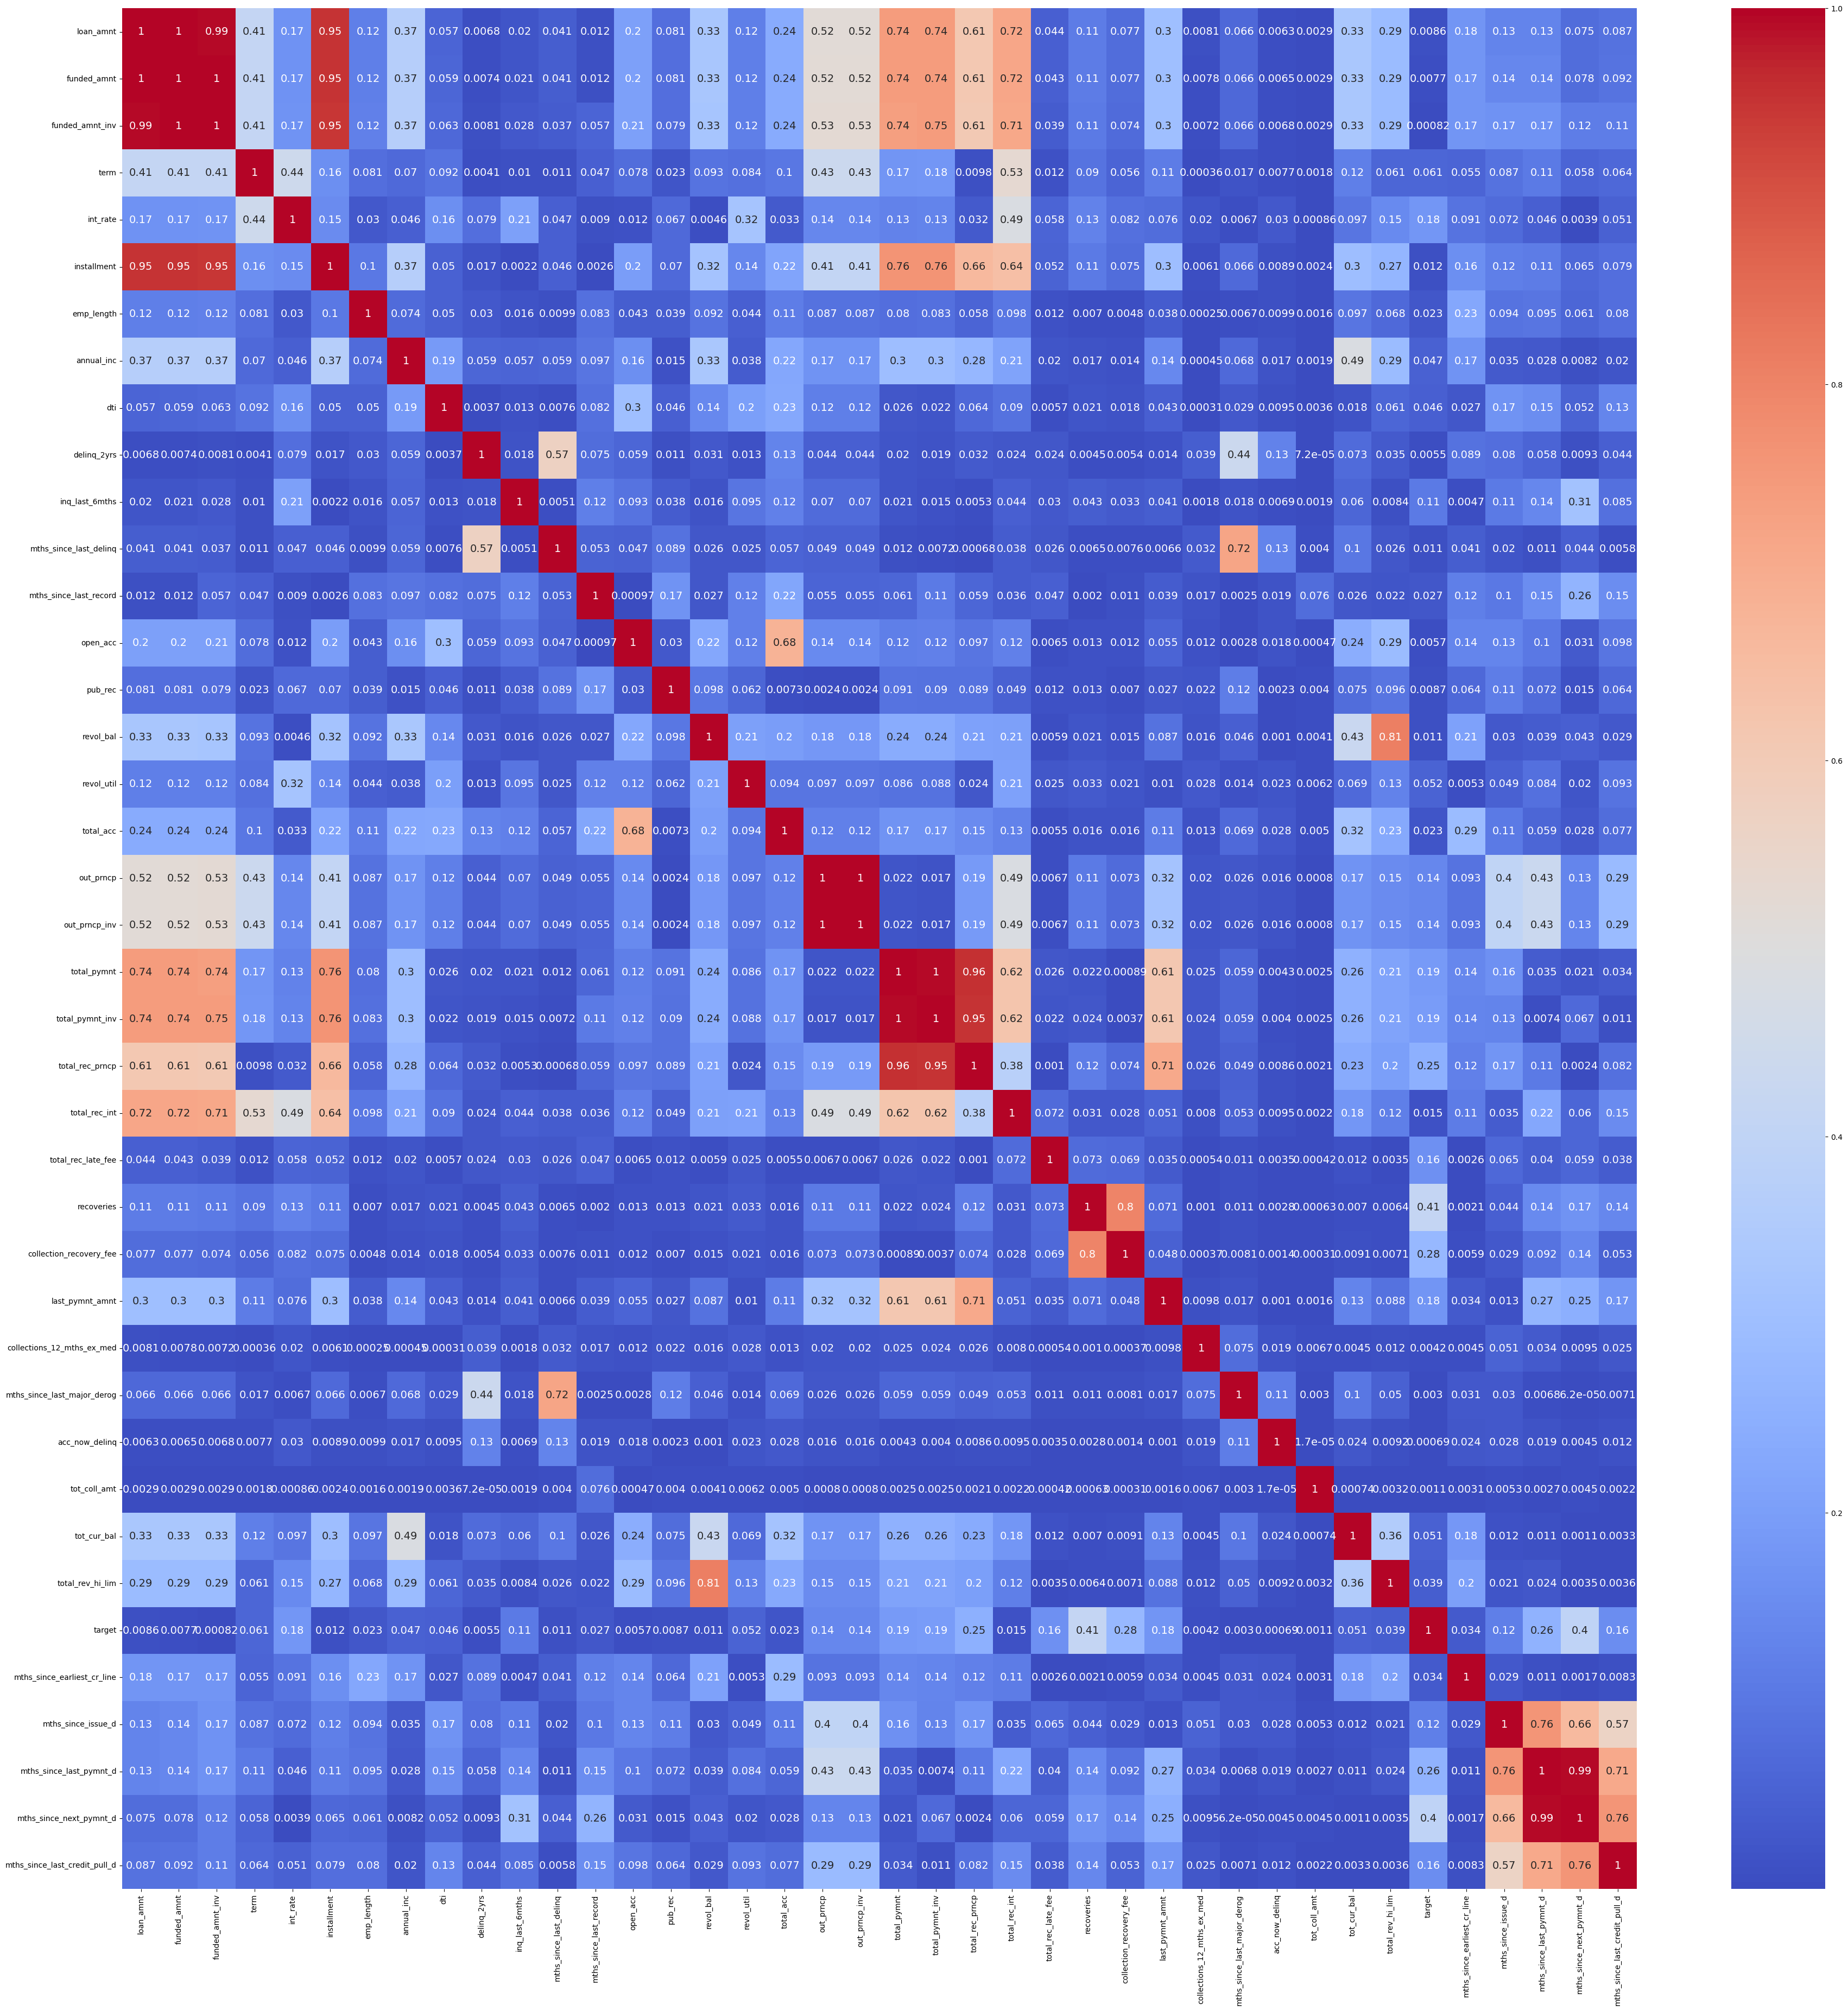

In [83]:
# Count matriks korelasi
corr_matrix = loan_model.corr().abs()

# Set Plot Size
plt.figure(figsize=(45, 45))

# Create Heatmap 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 14})

# Show plot
plt.show()

In [84]:
corr_matrix = loan_model.corr().abs()
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))
to_drop_corr = [column for column in high_corr.columns if any(high_corr[column] > 0.7)]
to_drop_corr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [85]:
loan_model.drop(to_drop_corr, axis=1, inplace=True)

### Categorical Features Check

In [86]:
loan_model.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

In [87]:
loan_model.drop(['pymnt_plan'], axis=1, inplace=True)

In [88]:
loan_model.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
term                                2
int_rate                          506
emp_length                         11
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
target                              2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

### Handling Missing Values

In [89]:
missing_values = loan_model.isnull().sum() * 100 / loan_model.shape[0]
missing_values[missing_values > 0].sort_values(ascending=False)

mths_since_last_record        86.567
mths_since_last_delinq        53.691
tot_coll_amt                  15.071
tot_cur_bal                   15.071
emp_length                     4.505
revol_util                     0.073
collections_12_mths_ex_med     0.031
delinq_2yrs                    0.006
inq_last_6mths                 0.006
open_acc                       0.006
pub_rec                        0.006
total_acc                      0.006
acc_now_delinq                 0.006
mths_since_earliest_cr_line    0.006
annual_inc                     0.001
dtype: float64

Key Takeaways:

- For features with a high percentage of missing values, such as mths_since_last_record and mths_since_last_delinq these features have high correlations of approximately 86.567 and 53.691, respectively. This suggests that the longer it has been since the last record or delinquency, the lower the likelihood of having missing values. we may need to drop them altogether. This is because the missing values are too high and could skew the results of our analysis.

- For features tot_coll_amt and tot_cur_bal these features have high correlations of approximately 15.071. As they are related to the total amount of collections and current balance, it may be reasonable to replace missing values with suitable imputation methods.

- For features with a lower percentage of missing values, such as emp_length and revol_util, we may be able to impute the missing values. This means that we can replace the missing values with estimated values.

In [90]:
loan_model.drop('mths_since_last_record', axis=1, inplace=True)

In [91]:
loan_model['annual_inc'].fillna(loan_model['annual_inc'].median(), inplace=True)
loan_model['mths_since_earliest_cr_line'].fillna(loan_model['mths_since_earliest_cr_line'].median(), inplace=True)
loan_model['acc_now_delinq'].fillna(loan_model['acc_now_delinq'].median(), inplace=True)
loan_model['total_acc'].fillna(loan_model['total_acc'].median(), inplace=True)
loan_model['pub_rec'].fillna(loan_model['pub_rec'].median(), inplace=True)
loan_model['open_acc'].fillna(loan_model['open_acc'].median(), inplace=True)
loan_model['inq_last_6mths'].fillna(loan_model['inq_last_6mths'].median(), inplace=True)
loan_model['delinq_2yrs'].fillna(loan_model['delinq_2yrs'].median(), inplace=True)
loan_model['collections_12_mths_ex_med'].fillna(loan_model['collections_12_mths_ex_med'].median(), inplace=True)
loan_model['revol_util'].fillna(loan_model['revol_util'].median(), inplace=True)
loan_model['emp_length'].fillna(loan_model['emp_length'].median(), inplace=True)
loan_model['tot_cur_bal'].fillna(loan_model['tot_cur_bal'].median(), inplace=True)
loan_model['tot_coll_amt'].fillna(loan_model['tot_coll_amt'].median(), inplace=True)
loan_model['mths_since_last_delinq'].fillna(loan_model['mths_since_last_delinq'].median(), inplace=True)


In [92]:
loan_model.head(1).T

,0
loan_amnt,5000
term,36.000
int_rate,10.650
grade,B
emp_length,10.000
home_ownership,RENT
annual_inc,24000.000
verification_status,Verified
purpose,credit_card
dti,27.650


In [93]:
# Grouping Features Based on Their Data Type

num_model = loan_model.select_dtypes(include=[np.number]).columns
cat_model = loan_model.select_dtypes(exclude=[np.number]).columns

### Categorical Feature Encoding

In [94]:
# Select categorical features
cat_features = loan_model[cat_model]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical features
cat_encoded = encoder.fit_transform(cat_features)

# Get the unique values for each categorical feature
feature_names = []
for feature in cat_features.columns:
    feature_values = cat_features[feature].unique()
    feature_names.extend([f"{feature}_{value}" for value in feature_values])

# Convert the encoded features to a DataFrame
cat_encoded = pd.DataFrame(cat_encoded.toarray(), columns=feature_names)


In [95]:
cat_encoded.head()

,grade_B,grade_C,grade_A,grade_E,grade_F,grade_D,grade_G,home_ownership_RENT,home_ownership_OWN,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_NONE,home_ownership_ANY,verification_status_Verified,verification_status_Source Verified,verification_status_Not Verified,purpose_credit_card,purpose_car,purpose_small_business,purpose_other,purpose_wedding,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_moving,purpose_vacation,purpose_house,purpose_renewable_energy,purpose_educational,initial_list_status_f,initial_list_status_w
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
4,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000


### Numerical Feature Transformation

In [96]:
# Drop column 'target' for num_features
num_features = num_model.drop('target')


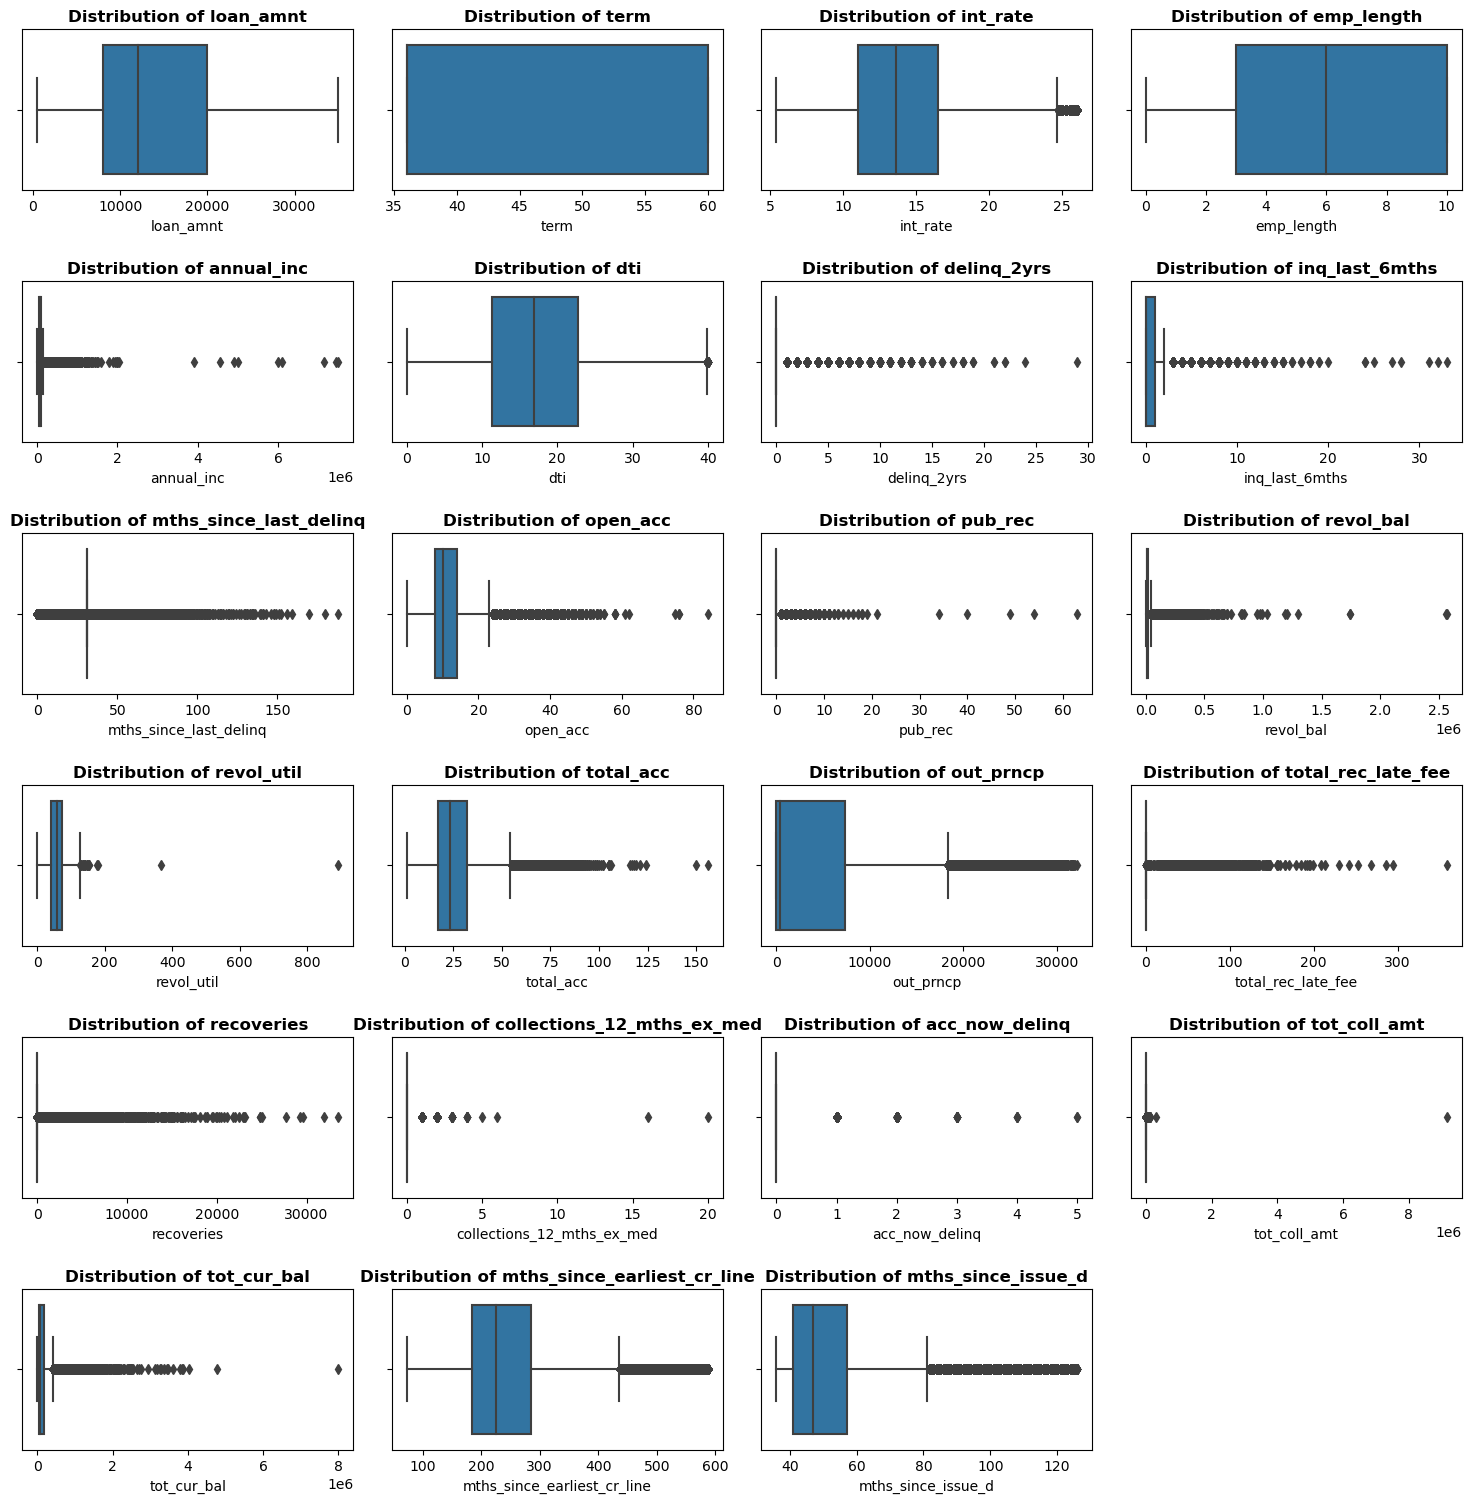

In [97]:
plt.rcParams['figure.figsize'] = 15, 20

for i in range(0, len(num_features)):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(x=loan_model[num_features[i]])
    plt.title('Distribution of ' + num_features[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)


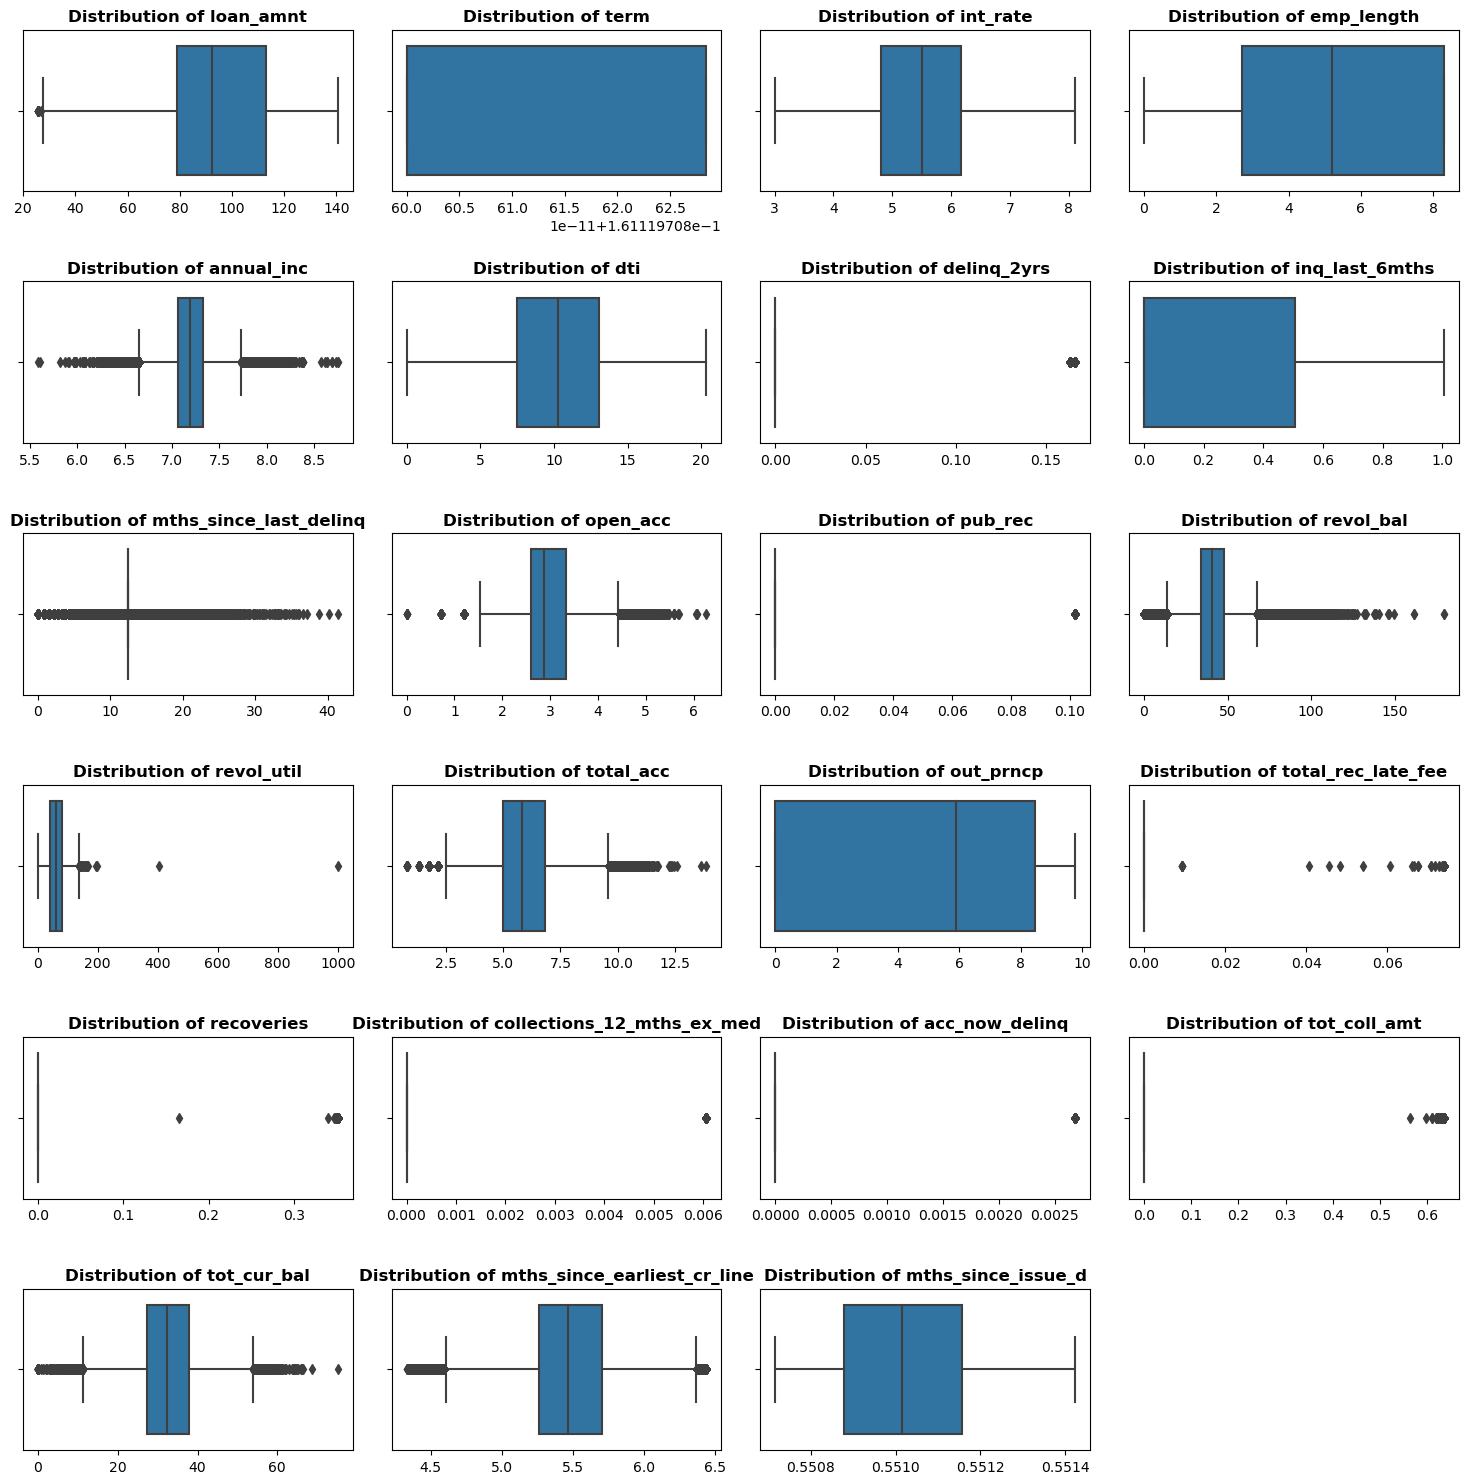

In [98]:
plt.rcParams['figure.figsize'] = (15, 20)

transformed_data = pd.DataFrame()  # Membuat DataFrame kosong untuk menyimpan hasil transformasi

for i, feature in enumerate(num_features):
    plt.subplot(8, 4, i + 1)
    num_features_transformed = stats.yeojohnson(loan_model[feature])[0]
    transformed_data[feature] = num_features_transformed
    sns.boxplot(x=num_features_transformed)
    plt.title('Distribution of ' + feature,
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

plt.show()


In [99]:
transformed_data.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d
0,65.362,0.161,4.706,8.296,6.797,15.232,-0.000,0.506,12.476,1.538,-0.000,42.539,89.634,3.535,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,32.450,6.035,0.551
1,49.533,0.161,5.891,0.000,6.891,0.910,-0.000,0.855,12.476,1.538,-0.000,22.973,9.698,2.160,-0.000,-0.000,0.351,-0.000,-0.000,-0.000,32.450,5.460,0.551
2,48.726,0.161,6.053,8.296,6.501,6.020,-0.000,0.679,12.476,1.192,-0.000,27.218,105.803,3.751,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,32.450,5.309,0.551
3,85.998,0.161,5.458,8.296,7.095,11.783,-0.000,0.506,13.558,2.874,-0.000,32.876,21.943,7.333,-0.000,0.074,-0.000,-0.000,-0.000,-0.000,32.450,5.619,0.551
4,53.299,0.161,5.254,0.957,7.287,10.804,-0.000,-0.000,14.340,3.422,-0.000,52.043,57.257,7.426,6.393,-0.000,-0.000,-0.000,-0.000,-0.000,32.450,5.622,0.551


### Numerical Feature Scalling 

In [100]:
 # Scale the transformed feature using the StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(transformed_data)

# Create New DataFrame for data after scaling
num_standardized = pd.DataFrame(standardized_data, columns=transformed_data.columns)

In [101]:
# Display the descriptive statistics
num_standardized.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.269,-0.000,-0.692,1.110,-1.922,1.284,-0.466,0.709,-0.011,-2.400,-0.389,0.140,1.164,-1.674,-1.002,-0.153,-0.235,-0.092,-0.061,-0.346,-0.013,1.582,1.449
1,-1.952,0.000,0.397,-1.759,-1.462,-2.394,-0.466,1.839,-0.011,-2.400,-0.389,-1.619,-1.958,-2.659,-1.002,-0.153,4.258,-0.092,-0.061,-0.346,-0.013,-0.055,1.449
2,-1.987,-0.000,0.545,1.110,-3.364,-1.081,-0.466,1.268,-0.011,-2.999,-0.389,-1.237,1.795,-1.519,-1.002,-0.153,-0.235,-0.092,-0.061,-0.346,-0.013,-0.484,1.449
3,-0.378,-0.000,-0.001,1.110,-0.470,0.399,-0.466,0.709,0.254,-0.084,-0.389,-0.729,-1.480,1.046,-1.002,6.535,-0.235,-0.092,-0.061,-0.346,-0.013,0.397,1.449
4,-1.789,0.000,-0.188,-1.429,0.464,0.147,-0.466,-0.933,0.446,0.865,-0.389,0.994,-0.101,1.113,0.524,-0.153,-0.235,-0.092,-0.061,-0.346,-0.013,0.408,1.449


### Cleaned Data Model

In [102]:
data_final = pd.concat([num_standardized, cat_encoded, loan_model[['target']]], axis=1)
data_final.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,grade_B,grade_C,grade_A,grade_E,grade_F,grade_D,grade_G,home_ownership_RENT,home_ownership_OWN,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_NONE,home_ownership_ANY,verification_status_Verified,verification_status_Source Verified,verification_status_Not Verified,purpose_credit_card,purpose_car,purpose_small_business,purpose_other,purpose_wedding,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_moving,purpose_vacation,purpose_house,purpose_renewable_energy,purpose_educational,initial_list_status_f,initial_list_status_w,target
0,-1.269,-0.000,-0.692,1.110,-1.922,1.284,-0.466,0.709,-0.011,-2.400,-0.389,0.140,1.164,-1.674,-1.002,-0.153,-0.235,-0.092,-0.061,-0.346,-0.013,1.582,1.449,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0
1,-1.952,0.000,0.397,-1.759,-1.462,-2.394,-0.466,1.839,-0.011,-2.400,-0.389,-1.619,-1.958,-2.659,-1.002,-0.153,4.258,-0.092,-0.061,-0.346,-0.013,-0.055,1.449,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1
2,-1.987,-0.000,0.545,1.110,-3.364,-1.081,-0.466,1.268,-0.011,-2.999,-0.389,-1.237,1.795,-1.519,-1.002,-0.153,-0.235,-0.092,-0.061,-0.346,-0.013,-0.484,1.449,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0
3,-0.378,-0.000,-0.001,1.110,-0.470,0.399,-0.466,0.709,0.254,-0.084,-0.389,-0.729,-1.480,1.046,-1.002,6.535,-0.235,-0.092,-0.061,-0.346,-0.013,0.397,1.449,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0
4,-1.789,0.000,-0.188,-1.429,0.464,0.147,-0.466,-0.933,0.446,0.865,-0.389,0.994,-0.101,1.113,0.524,-0.153,-0.235,-0.092,-0.061,-0.346,-0.013,0.408,1.449,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0


## Modeling

In [103]:
import shap
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    fbeta_score,
    make_scorer,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

### Splitting Data

In [104]:
# Seperate target variabel from feature
X = data_final.drop("target", axis=1)
y = data_final["target"]  # drop column 'target' from X

# Split Data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Show train and test data 
print("Number of rows and columns of training data:", X_train.shape)
print("Number of rows and columns of test data:", X_test.shape)

Number of rows and columns of training data: (373028, 55)
Number of rows and columns of test data: (93257, 55)


### Modeling (Algorithms implemented)

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

In [105]:
#model initialization
models = [
    ["Logistic Regression", LogisticRegression(class_weight="balanced", random_state=42)],
    ["Decision Tree", DecisionTreeClassifier(class_weight="balanced", random_state=42)],
    ["Random Forest", RandomForestClassifier(class_weight="balanced", random_state=42)],
    ["XGBClassifier", XGBClassifier(random_state=42)],
]

### Model Evaluation

In [106]:
# list kosong untuk menyimpan hasil evaluasi masing-masing model
results = []

# loop untuk masing-masing model
for model_name, model in models:
    # fit model dengan data train
    model.fit(X_train, y_train)

    # predict dengan data train
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # predict dengan data test
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # evaluasi model dengan data train
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob)

    # evaluasi model dengan data test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # tambahkan hasil evaluasi ke dalam list results
    results.append(
        {
            "Model": model_name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Train Precision": train_precision,
            "Test Precision": test_precision,
            "Train Recall": train_recall,
            "Test Recall": test_recall,
            "Train F1 Score": train_f1,
            "Test F1 Score": test_f1,
            "Train ROC AUC Score": train_roc_auc,
            "Test ROC AUC Score": test_roc_auc,
        }
    )

# gabungkan hasil evaluasi masing-masing model menjadi satu tabel
metrics_eval = pd.DataFrame(results)
metrics_eval.set_index("Model", inplace=True)
display(metrics_eval)

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC Score,Test ROC AUC Score
Model,,,,,,,,,,
Logistic Regression,0.852,0.854,0.434,0.436,0.655,0.653,0.522,0.523,0.842,0.843
Decision Tree,1.000,0.884,1.000,0.528,1.000,0.552,1.000,0.540,1.000,0.742
Random Forest,1.000,0.934,1.000,0.982,1.000,0.472,1.000,0.638,1.000,0.850
XGBClassifier,0.941,0.938,0.975,0.960,0.532,0.516,0.688,0.672,0.924,0.897


### Model Evaluation: Cross-Validation

In [107]:
# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_cv = []

# scoring yang akan digunakan untuk evaluasi
scoring = ["recall", "precision", "f1", "roc_auc"]

# cross-validation
for model in models:
    model_name = model[0]
    clf = model[1]
    cv_scores = cross_validate(
        clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
    )

    cv_recall_mean = abs(cv_scores["test_recall"]).mean()
    cv_recall_std = abs(cv_scores["test_recall"]).std()
    training_recall = abs(cv_scores["train_recall"]).mean()

    cv_precision_mean = abs(cv_scores["test_precision"]).mean()
    cv_precision_std = abs(cv_scores["test_precision"]).std()
    training_precision = abs(cv_scores["train_precision"]).mean()

    cv_f1_mean = abs(cv_scores["test_f1"]).mean()
    cv_f1_std = abs(cv_scores["test_f1"]).std()
    training_f1 = abs(cv_scores["train_f1"]).mean()

    cv_roc_auc_mean = abs(cv_scores["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_scores["test_roc_auc"]).std()
    training_roc_auc = abs(cv_scores["train_roc_auc"]).mean()

    results_cv.append(
        [
            model_name,
            training_recall,
            cv_recall_mean,
            cv_recall_std,
            training_precision,
            cv_precision_mean,
            cv_precision_std,
            training_f1,
            cv_f1_mean,
            cv_f1_std,
            training_roc_auc,
            cv_roc_auc_mean,
            cv_roc_auc_std,
        ]
    )

# buat DataFrame untuk menampung hasil evaluasi
df_results_cv = pd.DataFrame(
    results_cv,
    columns=[
        "Model",
        "Training Recall",
        "CV Recall (mean)",
        "CV Recall (std)",
        "Training Precision",
        "CV Precision (mean)",
        "CV Precision (std)",
        "Training F1",
        "CV F1 (mean)",
        "CV F1 (std)",
        "Training AUC_ROC",
        "CV AUC_ROC (mean)",
        "CV AUC_ROC (std)",
    ],
)

In [108]:
df_results_cv

,Model,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,Logistic Regression,0.655,0.655,0.005,0.434,0.433,0.003,0.522,0.521,0.002,0.842,0.842,0.001
1,Decision Tree,1.000,0.545,0.002,1.000,0.528,0.003,1.000,0.536,0.002,1.000,0.738,0.001
2,Random Forest,1.000,0.464,0.002,1.000,0.982,0.001,1.000,0.631,0.002,1.000,0.851,0.002
3,XGBClassifier,0.531,0.507,0.005,0.976,0.955,0.003,0.688,0.663,0.004,0.926,0.892,0.002


Key Takeaways:

- Among the models listed (Logistic Regression, Decision Tree, Random Forest, and XGBClassifier), the XGBClassifier stands out with the highest CV AUC_ROC (area under the receiver operating characteristic curve) score of 0.892. This indicates that the XGBClassifier has better overall discrimination power and ability to distinguish between positive and negative instances compared to the other models.

- The XGBClassifier exhibits high Training Precision (0.976) and CV Precision (mean) (0.955) scores, indicating its ability to minimize false positives and provide accurate positive predictions.

### Hyperparameter Tuning

In [112]:
# inisialisasi model
models = [
    {
        "model": XGBClassifier(),
        "params": {
            'max_depth': [7],
            'learning_rate': [0.1],
            'n_estimators': [300]
        },
    }
]


# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_tuned = []

# loop untuk masing-masing model
for model in models:
    # inisialisasi GridSearchCV dengan model dan hyperparameters yang telah ditentukan
    gs = GridSearchCV(model["model"], model["params"], cv=5, scoring="recall")

    # fit model dengan data train
    gs.fit(X_train, y_train)

    # mengambil nilai hyperparameter terbaik dari hasil GridSearchCV
    best_params = gs.best_params_

    # predict dengan data test
    y_test_pred = gs.predict(X_test)
    y_test_prob = gs.predict_proba(X_test)[:, 1]

    # evaluasi model dengan data test setelah hyperparameter tuning
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # evaluasi model dengan cross-validation
    cv_results = cross_validate(
        model["model"].set_params(**best_params),
        X_train,
        y_train,
        cv=5,
        scoring=["precision", "recall", "f1", "roc_auc"],
        return_train_score=True,
    )

    cv_recall_mean = abs(cv_results["test_recall"]).mean()
    cv_recall_std = abs(cv_results["test_recall"]).std()
    training_recall = abs(cv_results["train_recall"]).mean()
    cv_precision_mean = abs(cv_results["test_precision"]).mean()
    cv_precision_std = abs(cv_results["test_precision"]).std()
    training_precision = abs(cv_results["train_precision"]).mean()
    cv_f1_mean = abs(cv_results["test_f1"]).mean()
    cv_f1_std = abs(cv_results["test_f1"]).std()
    training_f1 = abs(cv_results["train_f1"]).mean()
    cv_roc_auc_mean = abs(cv_results["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_results["test_roc_auc"]).std()
    training_roc_auc = abs(cv_results["train_roc_auc"]).mean()

    # menyimpan hasil evaluasi dalam dictionary
    results_tuned.append(
        {
            "model": model["model"].__class__.__name__,
            "best_params": best_params,
            "Training Recall": training_recall,
            "CV Recall (mean)": cv_recall_mean,
            "CV Recall (std)": cv_recall_std,
            "Training Precision": training_precision,
            "CV Precision (mean)": cv_precision_mean,
            "CV Precision (std)": cv_precision_std,
            "Training F1": training_f1,
            "CV F1 (mean)": cv_f1_mean,
            "CV F1 (std)": cv_f1_std,
            "Training AUC_ROC": training_roc_auc,
            "CV AUC_ROC (mean)": cv_roc_auc_mean,
            "CV AUC_ROC (std)": cv_roc_auc_std,
        }
    )

# tampilkan hasil evaluasi untuk masing-masing model
df_results_tuned = pd.DataFrame(results_tuned)

df_results_tuned


,model,best_params,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.550,0.510,0.006,0.985,0.961,0.002,0.706,0.667,0.005,0.945,0.901,0.002


Key Takeaways:

- After hyperparameter tuning, the XGBClassifier model with the following best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300} achieved improved performance compared to the default configuration.

- The CV Precision (mean) score of 0.961 demonstrates the model's ability to generalize and maintain precision during cross-validation.

- The CV AUC_ROC (mean) score of 0.901 reflects the model's generalization capability and performance on unseen data during cross-validation.

### Feature Important

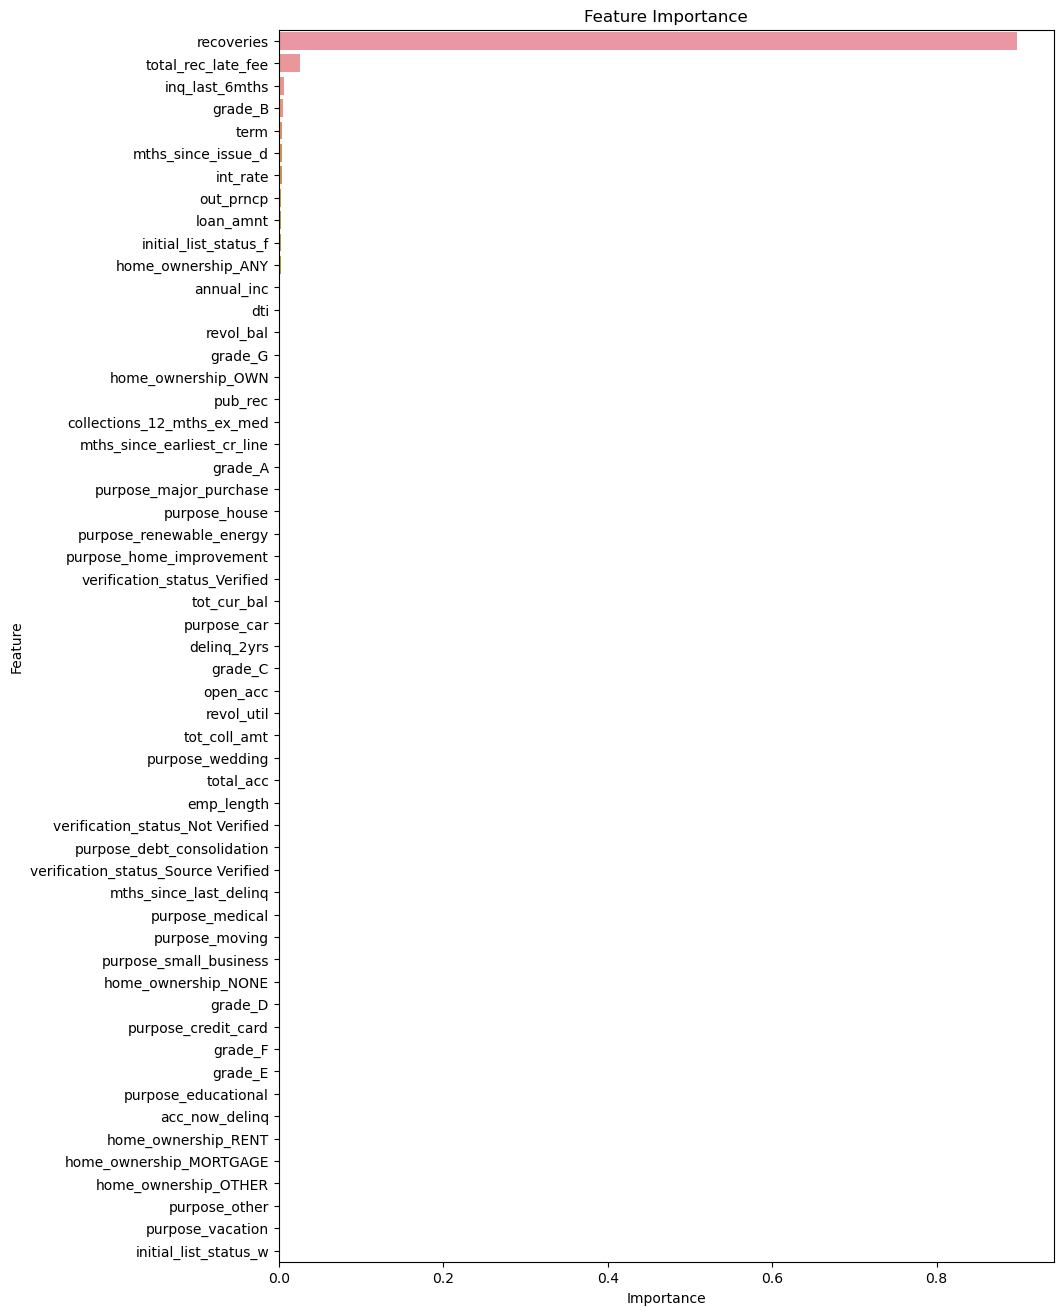

Nilai feature importance untuk masing-masing feature:
recoveries: 0.8975430727005005
total_rec_late_fee: 0.025889813899993896
inq_last_6mths: 0.005754151847213507
grade_B: 0.005134462378919125
term: 0.004451218992471695
mths_since_issue_d: 0.004432919900864363
int_rate: 0.004281539469957352
out_prncp: 0.003073781728744507
loan_amnt: 0.0029301014728844166
initial_list_status_f: 0.002431613625958562
home_ownership_ANY: 0.0022484336514025927
annual_inc: 0.0019303793087601662
dti: 0.0015804910799488425
revol_bal: 0.0014897233340889215
grade_G: 0.0014137219404801726
home_ownership_OWN: 0.0013980624498799443
pub_rec: 0.0013439353788271546
collections_12_mths_ex_med: 0.0013420672621577978
mths_since_earliest_cr_line: 0.0013081859797239304
grade_A: 0.0013038222678005695
purpose_major_purchase: 0.0012775961076840758
purpose_house: 0.001272933091968298
purpose_renewable_energy: 0.0012438641861081123
purpose_home_improvement: 0.0011942184064537287
verification_status_Verified: 0.00119250547140836

In [113]:
# inisialisasi model terbaik dengan hyperparameter terbaik
best_model = gs.best_estimator_

# fit model terbaik dengan data train
best_model.fit(X_train, y_train)

# tampilkan feature importance
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
plt.figure(figsize=(10, 16))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# tampilkan nama feature beserta nilai feature importance-nya
print("Nilai feature importance untuk masing-masing feature:")
for index in sorted_idx:
    print(f"{X.columns[index]}: {feature_importance[index]}")


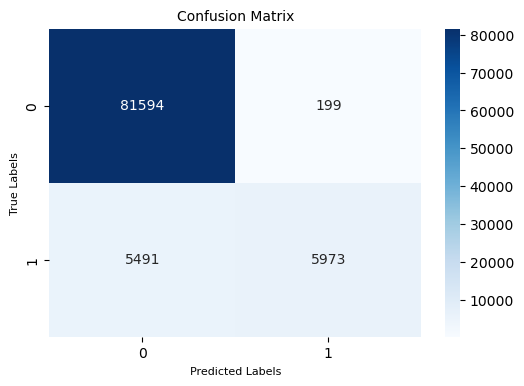

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     81793
           1       0.97      0.52      0.68     11464

    accuracy                           0.94     93257
   macro avg       0.95      0.76      0.82     93257
weighted avg       0.94      0.94      0.93     93257



In [114]:
# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix", fontsize=10)
plt.xlabel("Predicted Labels", fontsize=8)
plt.ylabel("True Labels", fontsize=8)
plt.savefig("Before_Threshold.png", dpi=300, bbox_inches="tight")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

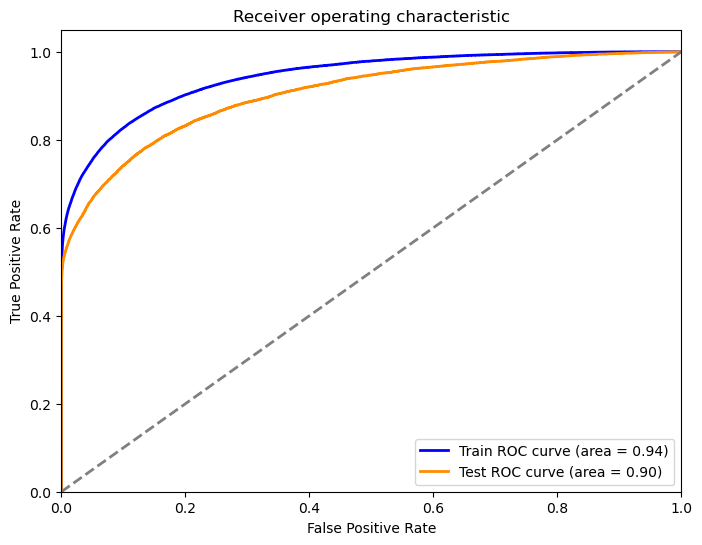

In [115]:
# predict with train and test data
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# calculate fpr, tpr, and thresholds for train and test
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# calculate auc values for train and test
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# plot ROC AUC Curve for train and test
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_train,
    tpr_train,
    color="blue",
    lw=2,
    label="Train ROC curve (area = %0.2f)" % roc_auc_train,
)
plt.plot(
    fpr_test,
    tpr_test,
    color="darkorange",
    lw=2,
    label="Test ROC curve (area = %0.2f)" % roc_auc_test,
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("ROC AUC Curve.png")
plt.show()

### Kolmogorov-Smirnov

In [120]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_test_prob, columns=['y_test_prob'])], axis=1)
df_actual_predicted.index = y_test.index

In [122]:
df_actual_predicted = df_actual_predicted.sort_values('y_test_prob')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())
     

In [123]:

df_actual_predicted.head()

,index,y_actual,y_test_prob,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,253074,0,0.001,1,0,1,0.000,0.000,0.000
1,261221,0,0.001,2,0,2,0.000,0.000,0.000
2,232760,0,0.001,3,0,3,0.000,0.000,0.000
3,340760,0,0.001,4,0,4,0.000,0.000,0.000
4,313867,0,0.001,5,0,5,0.000,0.000,0.000


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6465')

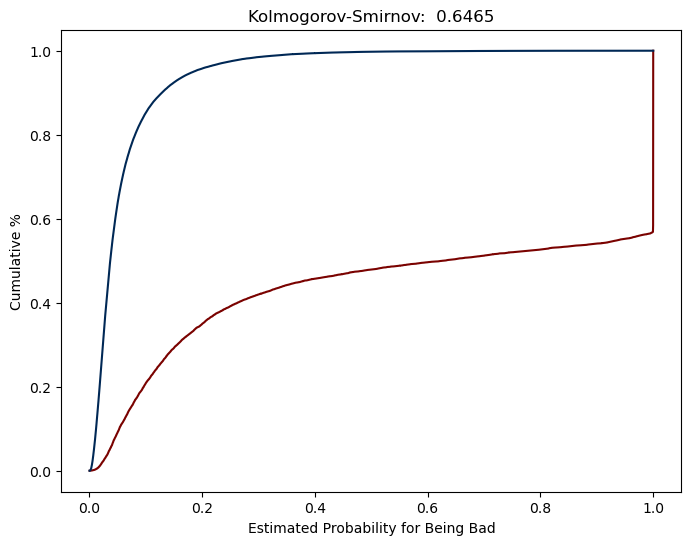

In [125]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.figure(figsize=(8, 6))
plt.plot(df_actual_predicted['y_test_prob'], df_actual_predicted['Cumulative Perc Bad'], color='#7a0200', linewidth=1.5)
plt.plot(df_actual_predicted['y_test_prob'], df_actual_predicted['Cumulative Perc Good'], color='#002855', linewidth=1.5)
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Key Takeaways:

- The XGBoost model with an AUC of 0.90 and a Kolmogorov-Smirnov (KS) statistic of 0.6465 performs well in handling credit risk. In the credit risk modeling practice, AUC above 0.7 and KS above 0.3 are considered as a good performances.
- A high AUC indicates a strong ability to distinguish between positive and negative instances, indicating good discrimination power.
- The KS statistic of 0.6465 suggests a significant difference in estimated probabilities for being bad between the positive and negative instances, indicating accurate identification of credit risk.

In [132]:
# Save the model as a .py file
import joblib
joblib.dump(best_model, 'IDX_partners_credit_risk_loan_model.py')

['IDX_partners_credit_risk_loan_model.py']